In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


%matplotlib inline

In [2]:
music = pd.read_csv("spotify.csv")

In [3]:
music.head()


Unnamed: 0  acousticness     album_name                            artist  \
0           0        0.1100      Con Calma                 Daddy Yankee,Snow   
1           1        0.6020        Secreto                  Anuel Aa,Karol G   
2           2        0.3230  Calma (Remix)                Pedro Capó,Farruko   
3           3        0.0446          Te Vi                 Piso 21,Micro Tdh   
4           4        0.1460   Desconocidos  Mau y Ricky,Manuel Turizo,Camilo   

   artist_followers                               artist_genres  \
0        10385849.0  latin,latin hip hop,pop,reggaeton,tropical   
1         4838252.0                  reggaeton flow,trap latino   
2          139977.0                                   latin pop   
3         2967485.0               colombian pop,latin,latin pop   
4          762288.0                latin,latin pop,pop,tropical   

   artist_popularity  danceability  duration_ms  energy   ...     liveness  \
0               90.0         0.737     193227.0   0.860   ...       0.0574   
1               93.0         0.807     258800.0   0.803   ...       0.1360   
2               82.0         0.826     238200.0   0.773   ...       0.1430   
3               82.0         0.877     231848.0   0.777   ...       0.0863   
4               81.0         0.709     204453.0   0.771   ...       0.2490   

   loudness                                             lyrics  mode  \
0    -2.652  d-d-d-d-d-dy play n' skillz ¡run! ¿cómo te lla...   0.0   
1    -4.156  (bebecita) (bebe-bebecita), uah bebecita lo de...   1.0   
2    -4.218  laramercy gang welcome to the paradise ¡farru!...   0.0   
3    -4.246  (¡uy!) tdh piso 21 (oh, no) micro tdh (no, no,...   1.0   
4    -4.598  desconocidos yeah, yeah, yeah sí, sí apenas so...   1.0   

   speechiness    tempo  time_signature     track_name  track_popularity  \
0       0.0593   93.989             4.0      Con Calma              95.0   
1       0.1260   91.987             4.0        Secreto              95.0   
2       0.0524  126.899             4.0  Calma - Remix              96.0   
3       0.1170  102.020             4.0          Te Vi              90.0   
4       0.1660  174.006             4.0   Desconocidos              92.0   

   valence  
0    0.656  
1    0.706  
2    0.761  
3    0.706  
4    0.709  

[5 rows x 23 columns]

In [4]:
music.columns.values


array(['Unnamed: 0', 'acousticness', 'album_name', 'artist',
       'artist_followers', 'artist_genres', 'artist_popularity',
       'danceability', 'duration_ms', 'energy', 'explicit',
       'instrumentalness', 'key', 'liveness', 'loudness', 'lyrics',
       'mode', 'speechiness', 'tempo', 'time_signature', 'track_name',
       'track_popularity', 'valence'], dtype=object)

In [5]:
#canciones que no traen letras :(
#music.columns[music.isna().any()].tolist()
music[music['lyrics'].isnull()]

Unnamed: 0  acousticness  \
14          14        0.1530   
23          23        0.5520   
31          31        0.0119   
39          39        0.2190   

                                           album_name  \
14     Taki Taki (with Selena Gomez, Ozuna & Cardi B)   
23  Spider-Man: Into the Spider-Verse (Deluxe Edit...   
31                          Promises (with Sam Smith)   
39                            En Peligro de Extinción   

                                    artist  artist_followers  \
14     DJ Snake,Selena Gomez,Ozuna,Cardi B         4118535.0   
23                    Post Malone,Swae Lee        11662474.0   
31    Calvin Harris,Sam Smith,Jessie Reyez        15537562.0   
39  La Adictiva Banda San José de Mesillas         1597779.0   

                                       artist_genres  artist_popularity  \
14  dance pop,edm,electronic trap,pop,tropical house               85.0   
23                                           pop,rap               95.0   
31         electro house,house,pop,progressive house               89.0   
39            banda,grupera,norteno,regional mexican               71.0   

    danceability  duration_ms  energy   ...     liveness  loudness  lyrics  \
14         0.841     212500.0   0.798   ...       0.0618    -4.206     NaN   
23         0.761     158040.0   0.479   ...       0.0704    -5.574     NaN   
31         0.781     213309.0   0.768   ...       0.3250    -5.991     NaN   
39         0.709     234198.0   0.483   ...       0.2410    -3.734     NaN   

    mode  speechiness    tempo  time_signature  \
14   0.0       0.2290   95.948             4.0   
23   1.0       0.0466   89.913             4.0   
31   1.0       0.0394  123.070             4.0   
39   1.0       0.0281  123.566             4.0   

                                        track_name  track_popularity  valence  
14  Taki Taki (with Selena Gomez, Ozuna & Cardi B)              95.0    0.591  
23   Sunflower - Spider-Man: Into the Spider-Verse              82.0    0.912  
31                       Promises (with Sam Smith)              90.0    0.486  
39                         En Peligro de Extinción              78.0    0.834  

[4 rows x 23 columns]

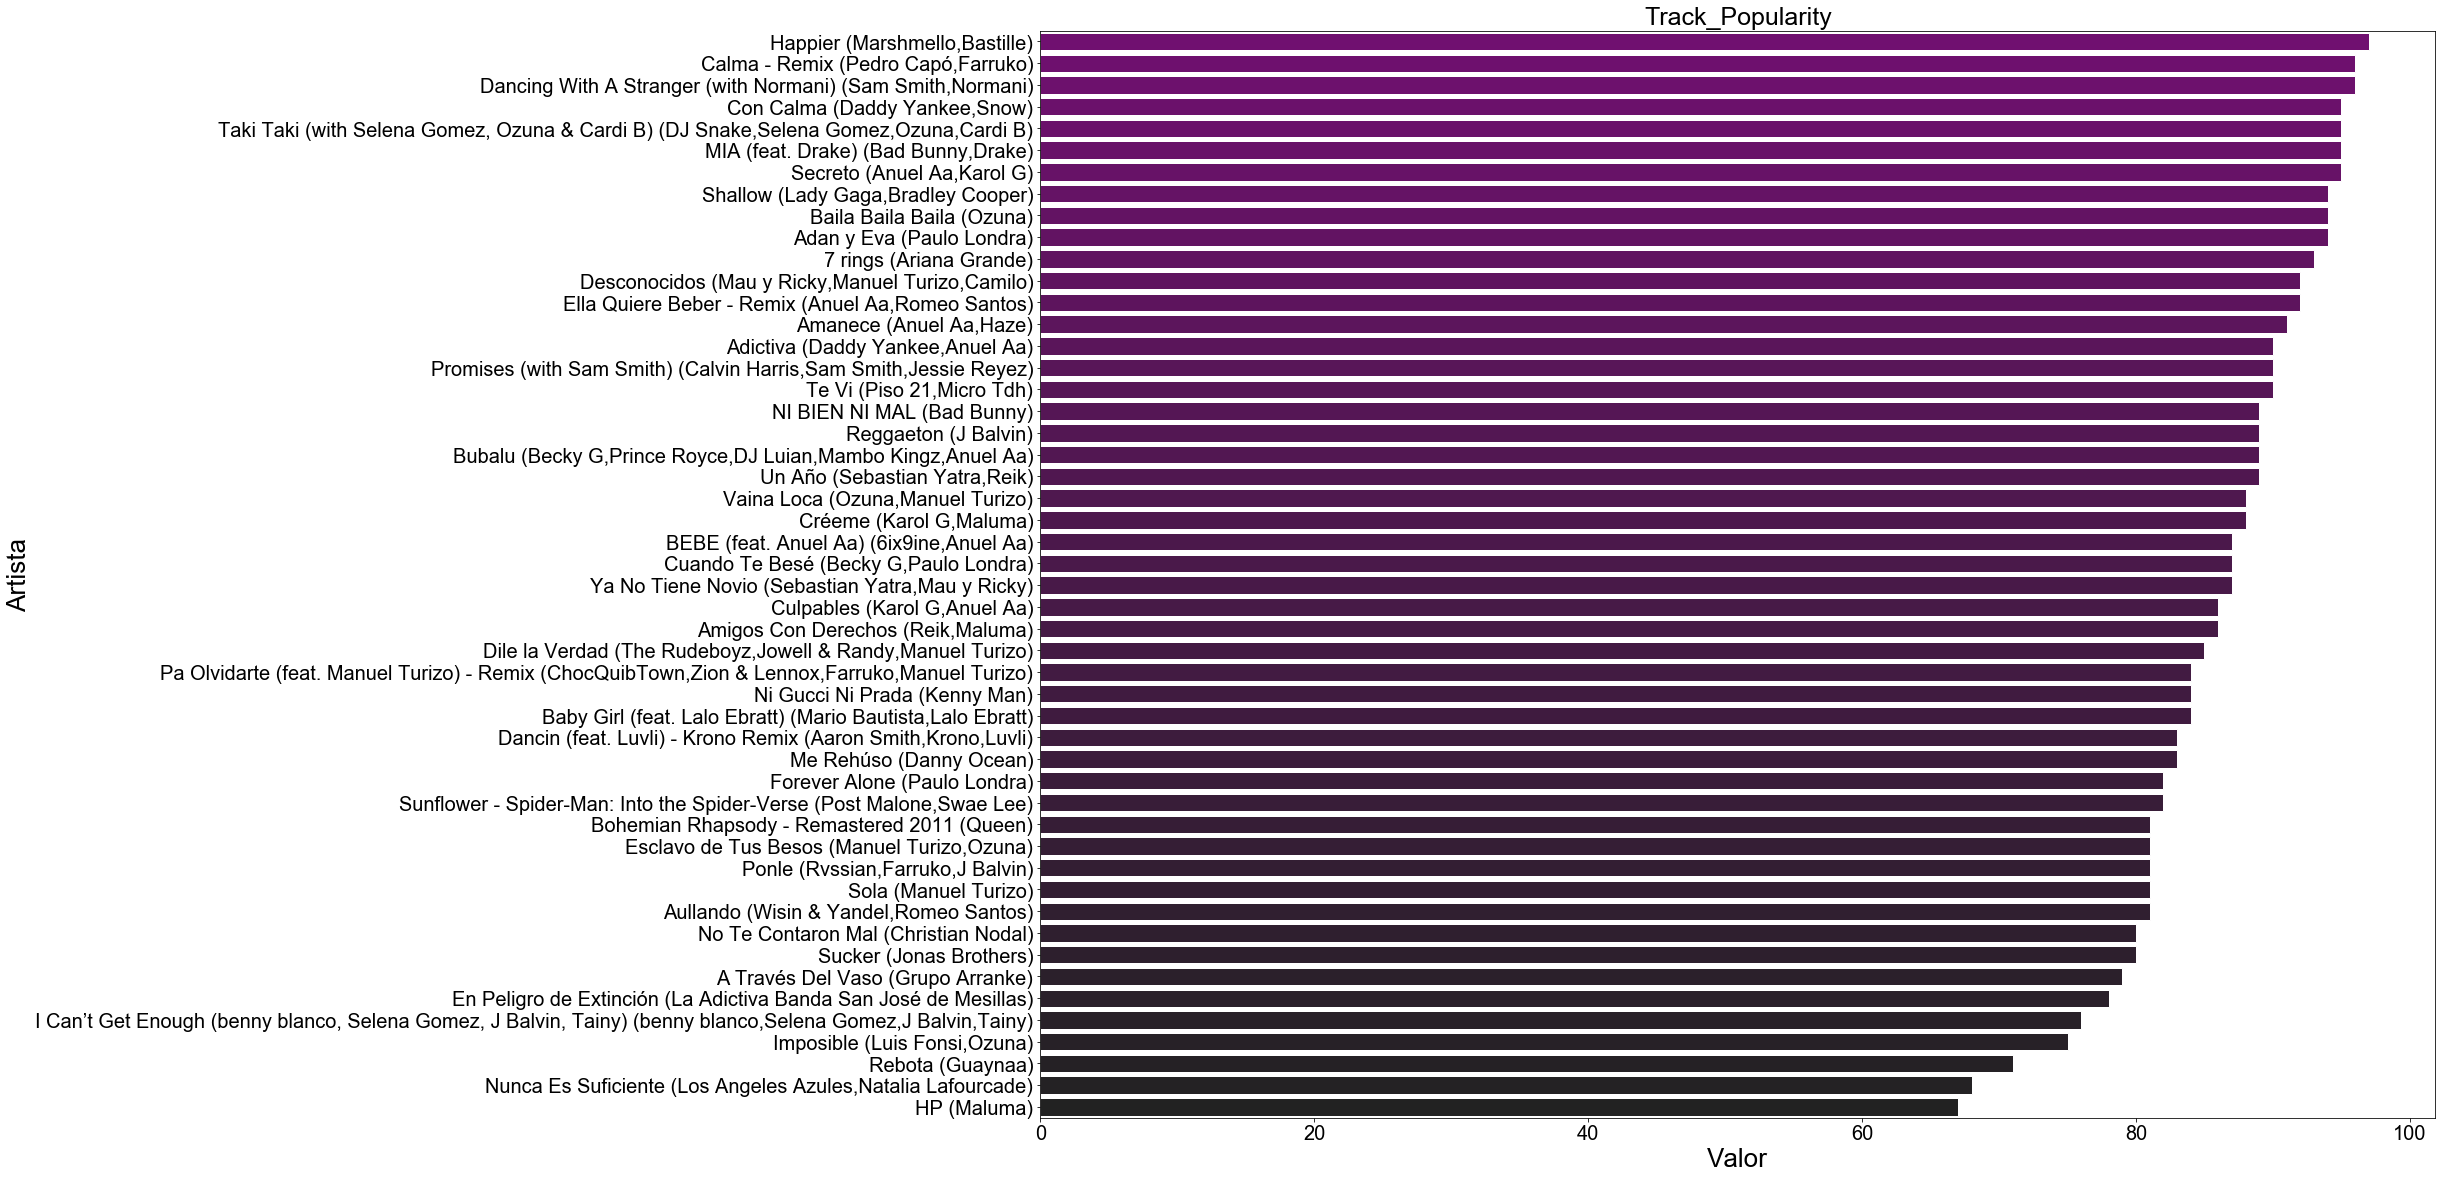

In [6]:
def grafico_atributo(atributo,color):

    fig, ax = plt.subplots(figsize=(25,20))
    sns.set(style="whitegrid")
    sns.set_color_codes("pastel")
    track_ordenados = music.sort_values(by=[atributo], ascending=False)
    #primeros = music.head().sort_values(by=[atributo], ascending=False)
    #ultimos = music.tail().sort_values(by=[atributo], ascending=False)
    #track_ordenados = pd.concat([primeros, ultimos])
    
    ax = sns.barplot(x=track_ordenados[atributo], y=track_ordenados['track_name'] +' (' + track_ordenados['artist'] + ')', data=track_ordenados,palette=sns.dark_palette(color, n_colors=50, reverse=True), ci=None)
    plt.ylabel('Artista', fontsize=26)
    plt.xlabel('Valor', fontsize=26)
    plt.title(atributo.title(), fontsize=25)

    for tick in ax.xaxis.get_major_ticks():
        tick.label.set_fontsize(20) 
    for tick in ax.yaxis.get_major_ticks():
        tick.label.set_fontsize(20)

    #for p in ax.patches:
    #    width = p.get_width()
    #    ax.text(width + 3  ,
    #            p.get_y() + p.get_height()/1.4,
    #            "%d" % width,
    #            ha="center", fontsize=15)
    #sns.despine()
    #plt.savefig('track_popularity.png')
    #plt.plot();
    
grafico_atributo("track_popularity","purple")

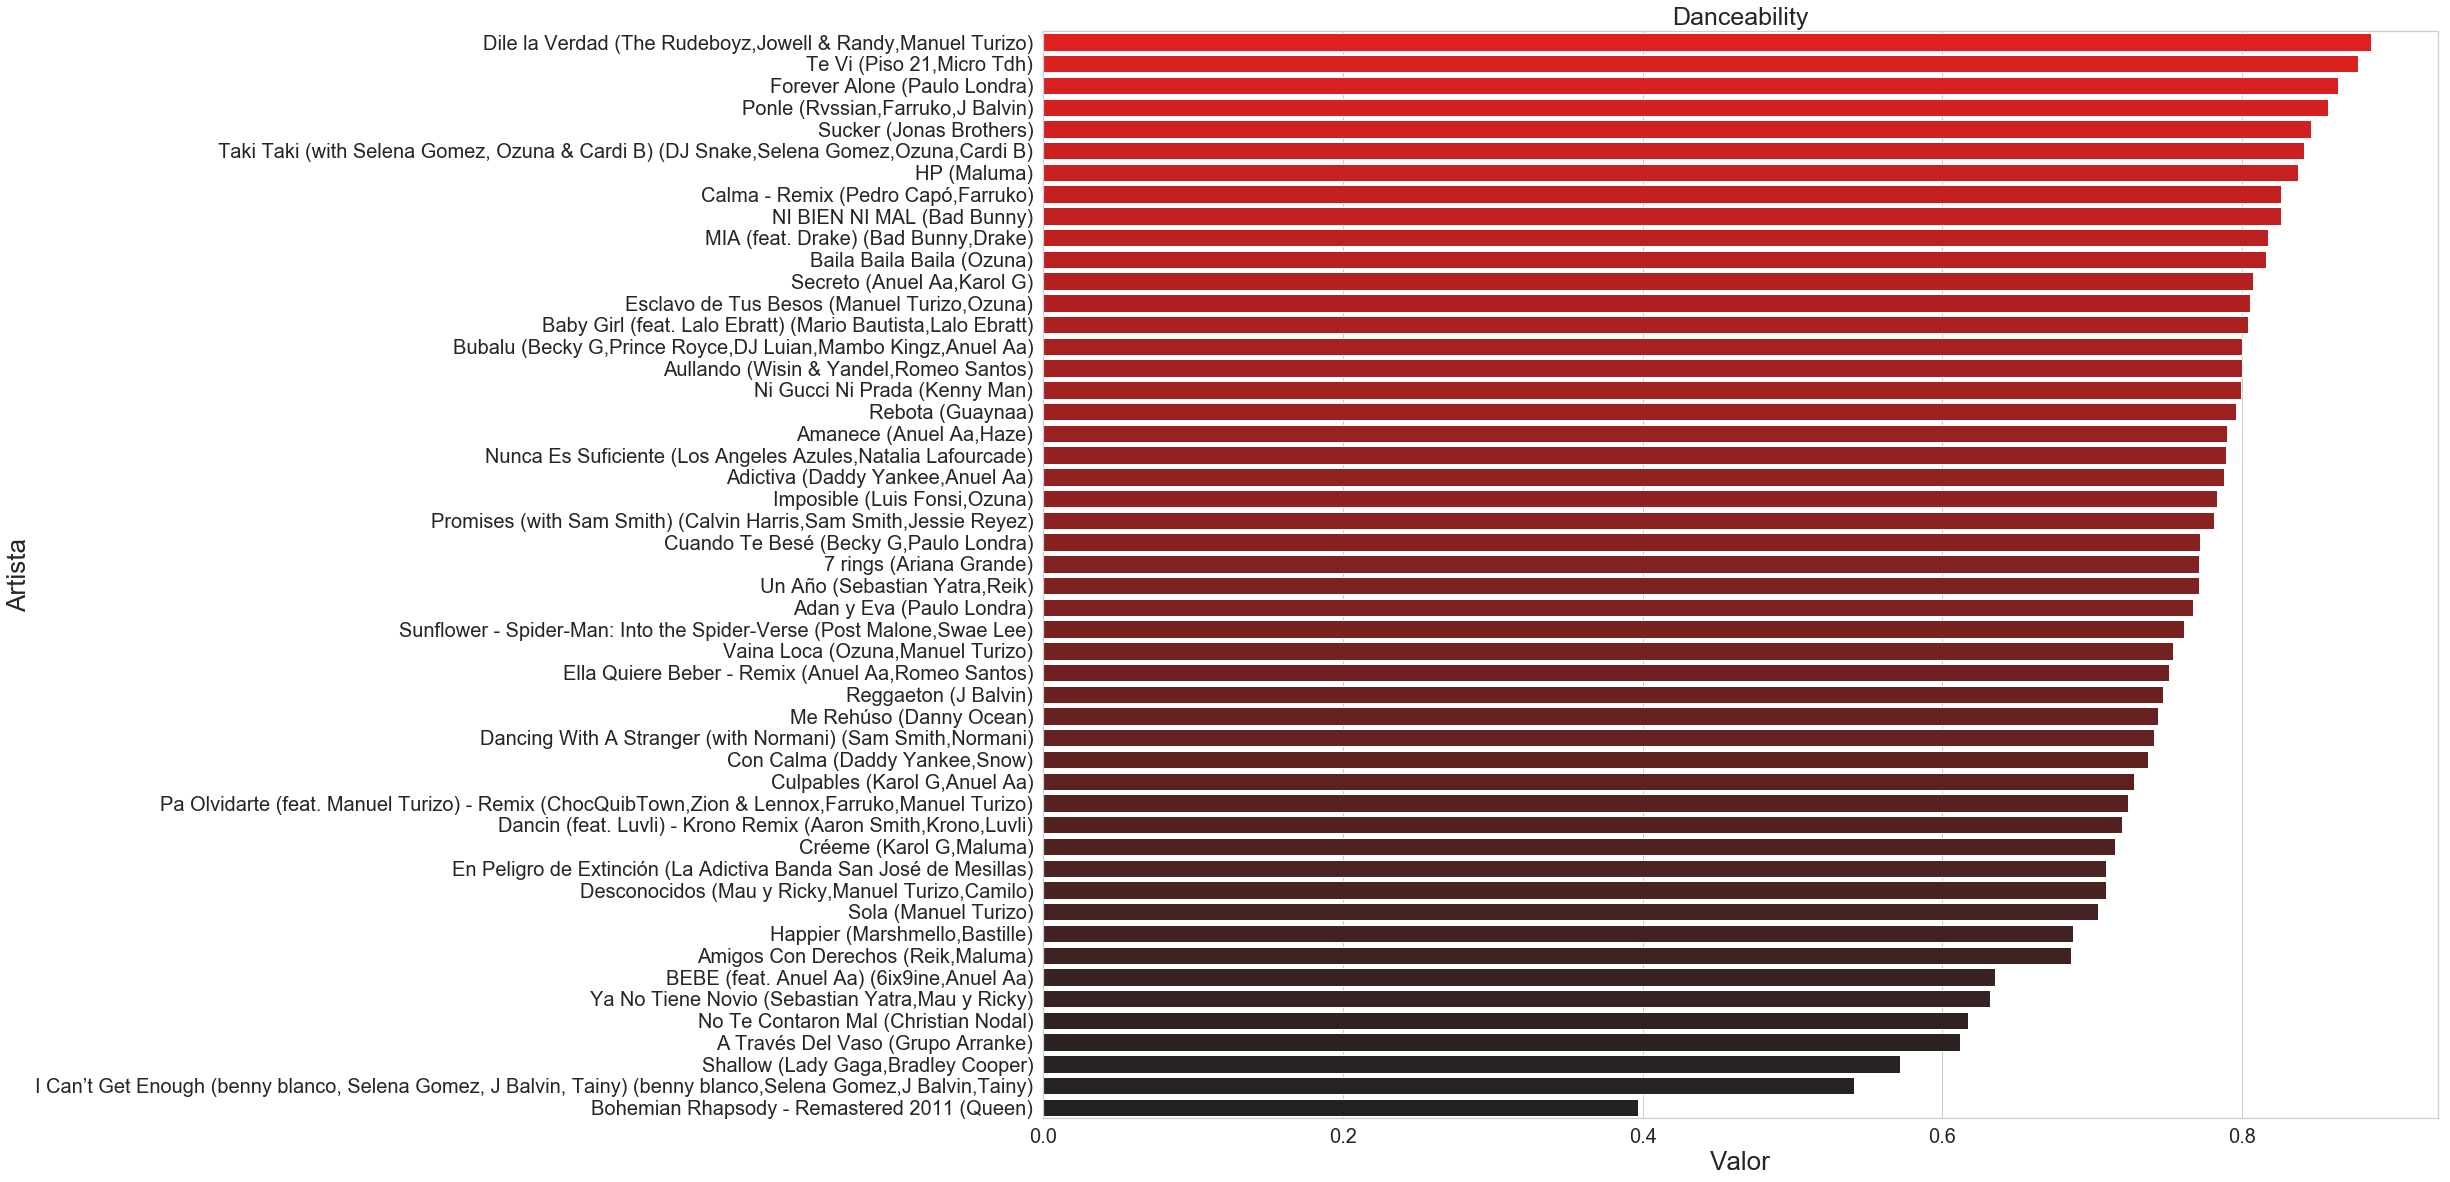

In [7]:
grafico_atributo("danceability","red")

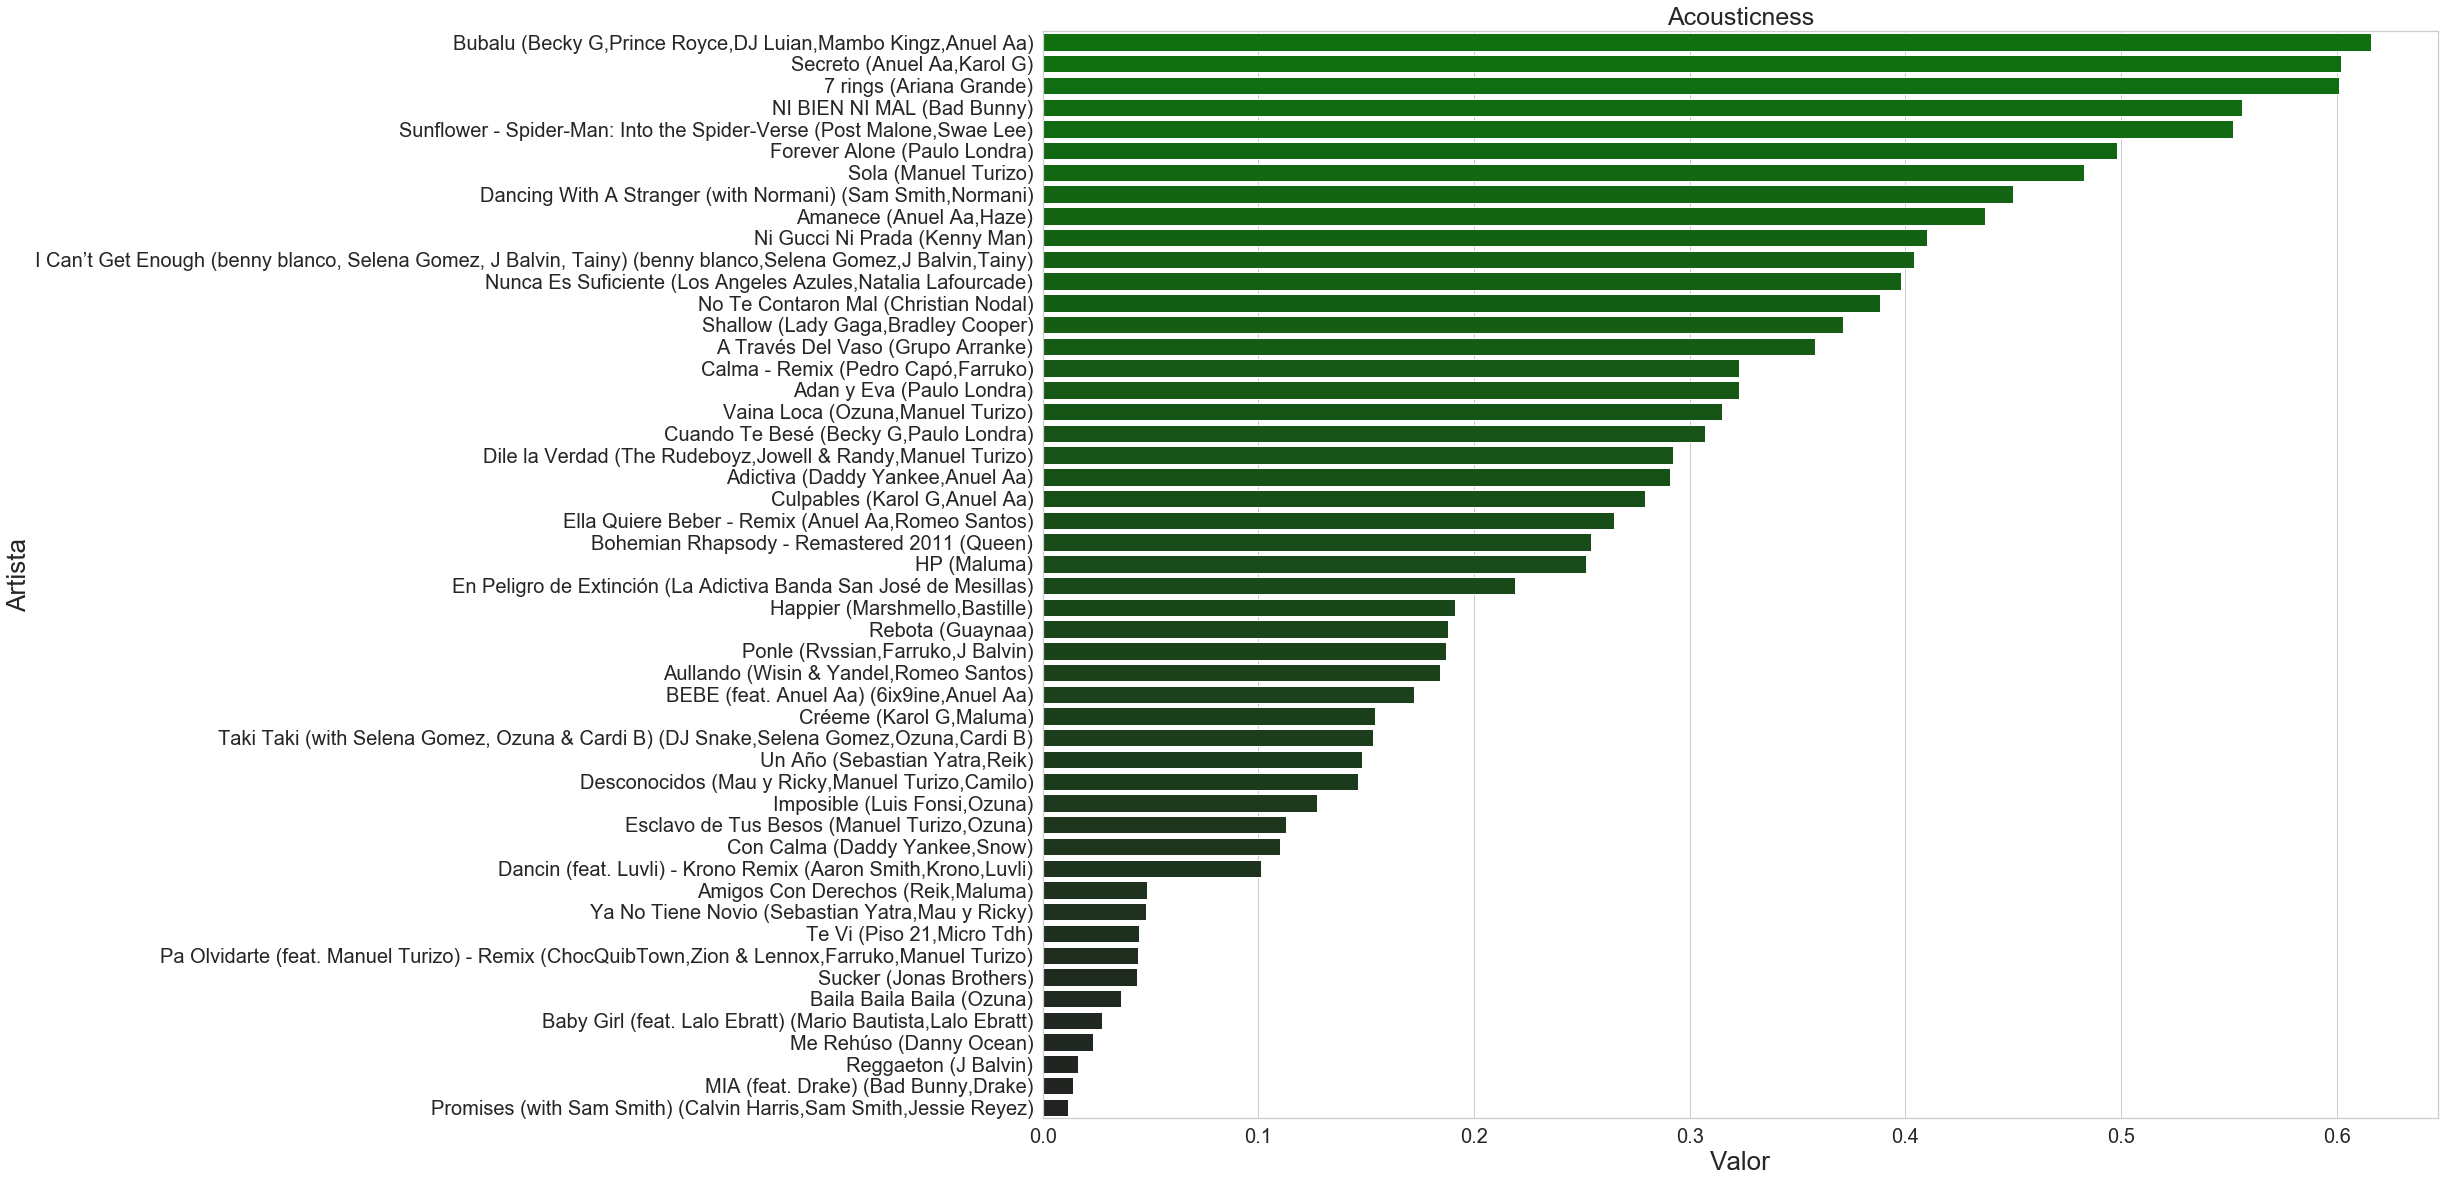

In [8]:
grafico_atributo("acousticness","green")

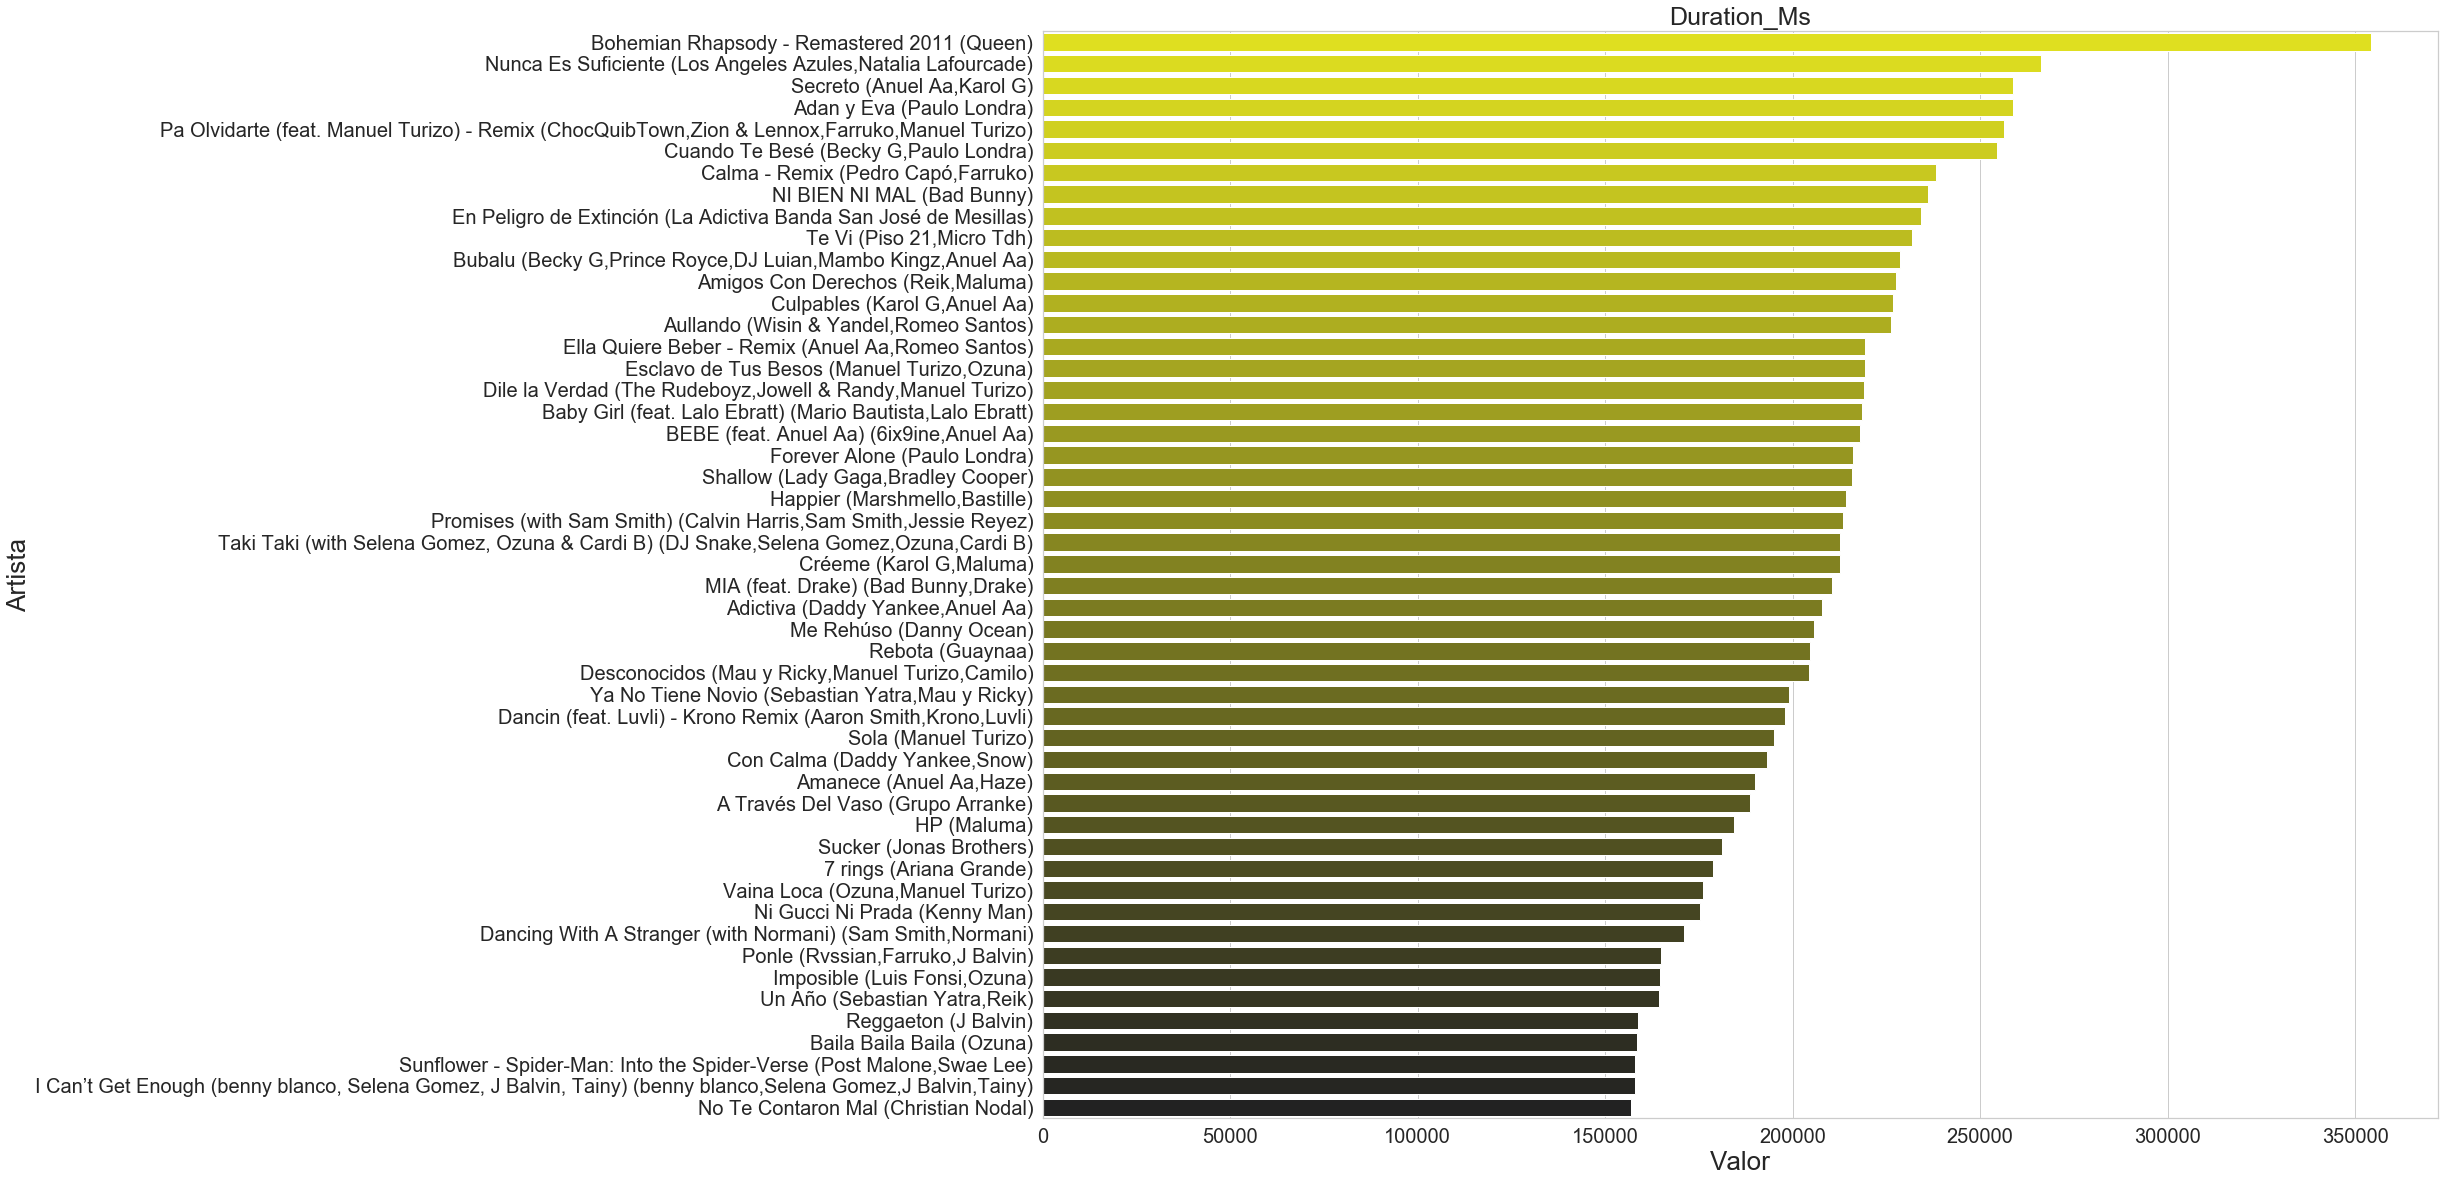

In [9]:
grafico_atributo("duration_ms","yellow")

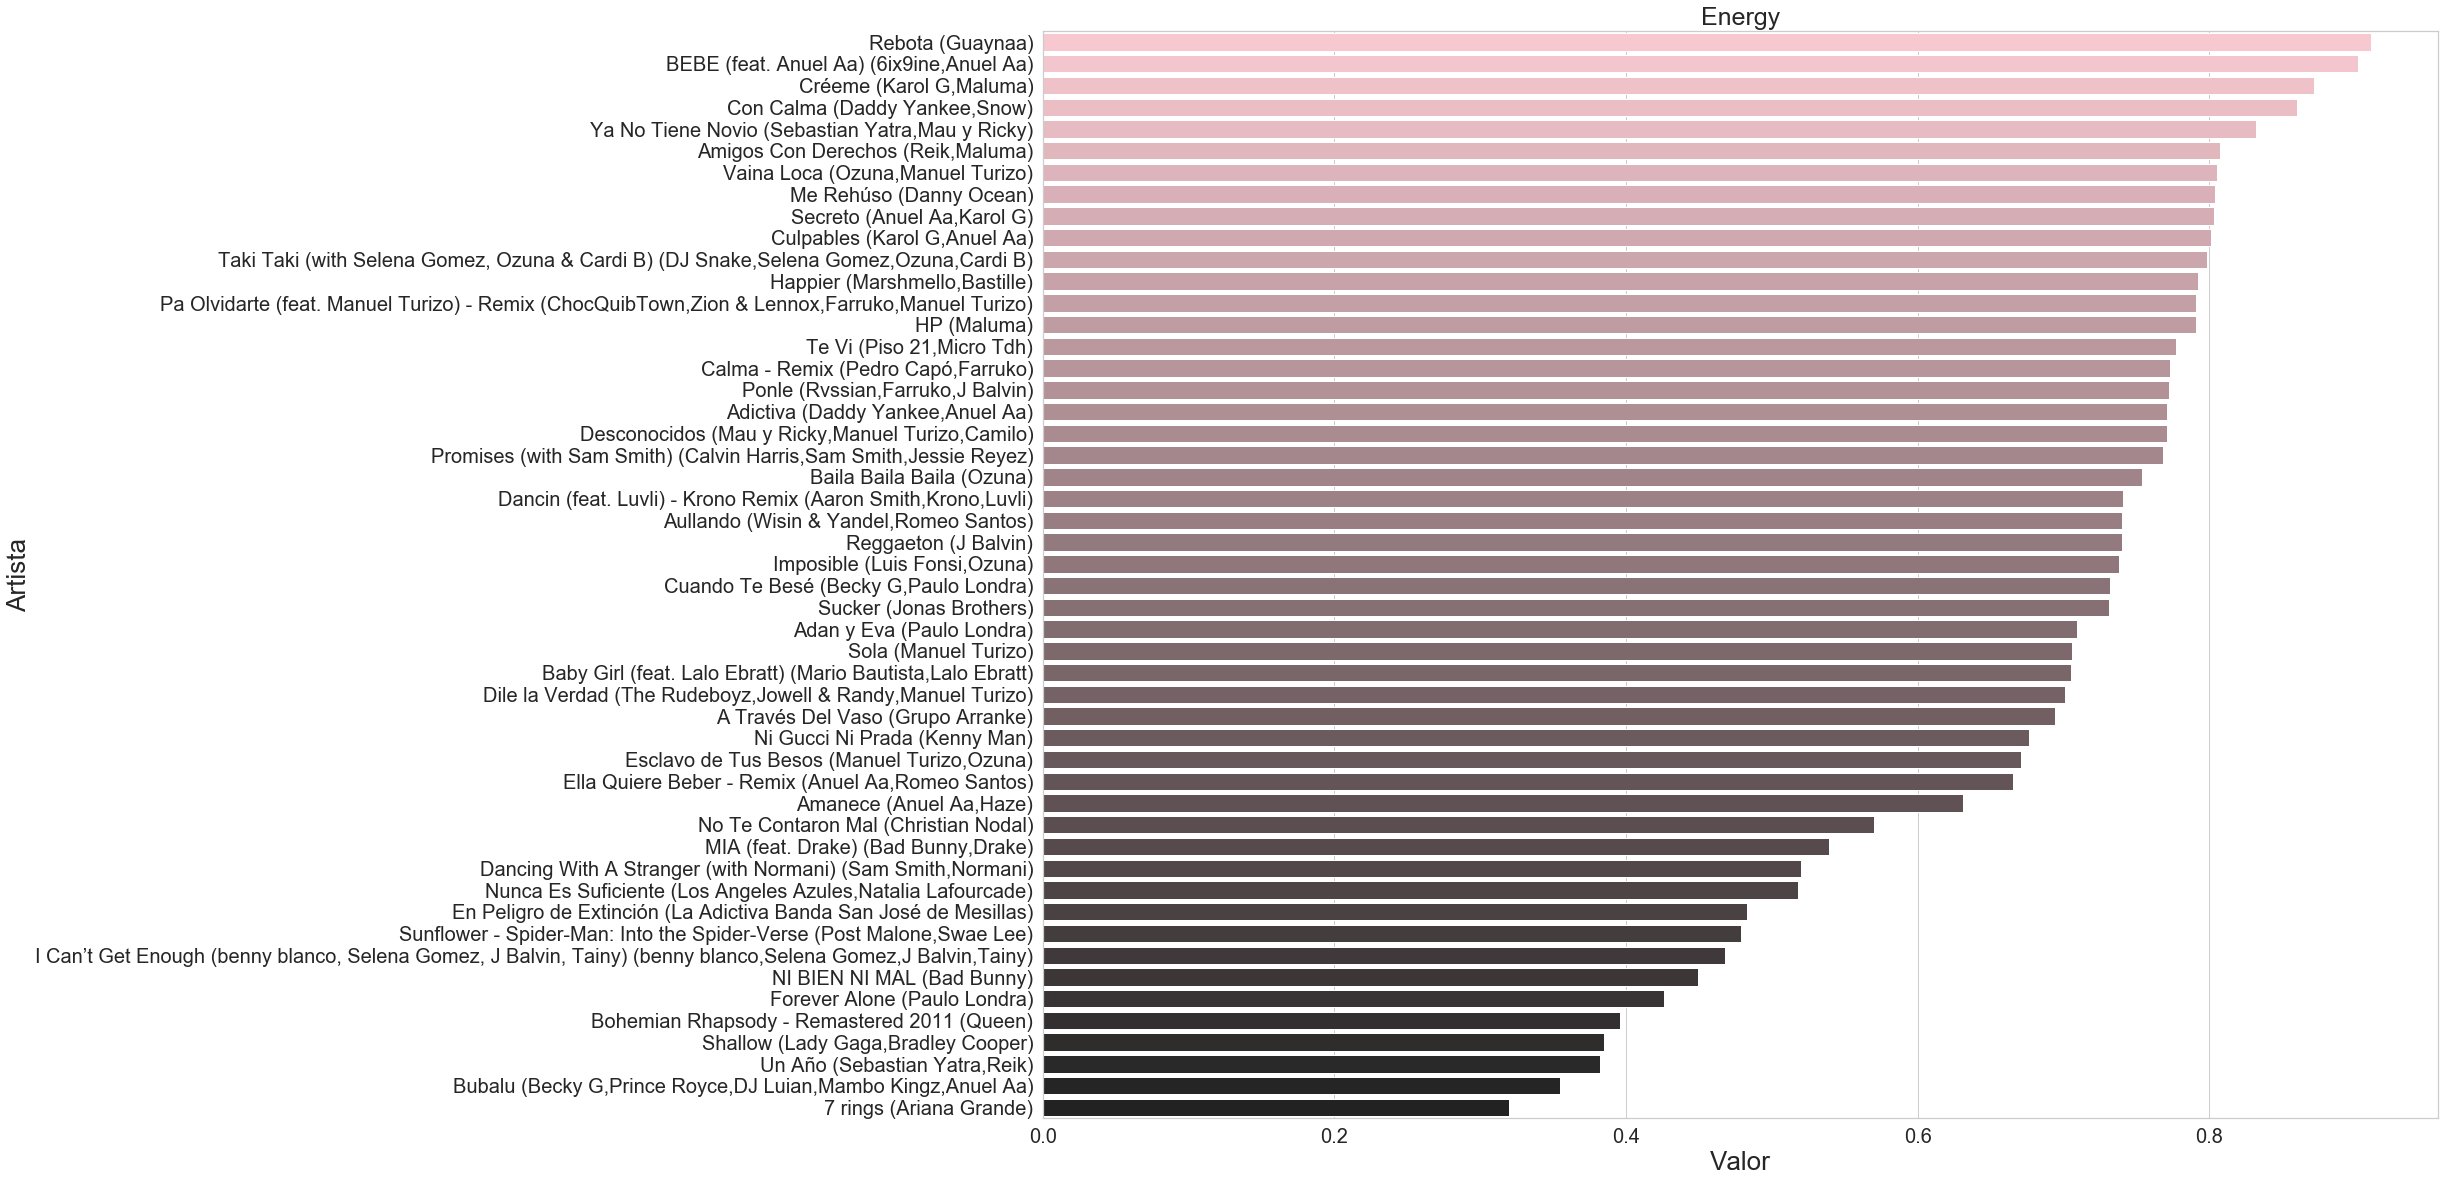

In [10]:
#energy
grafico_atributo("energy","pink")

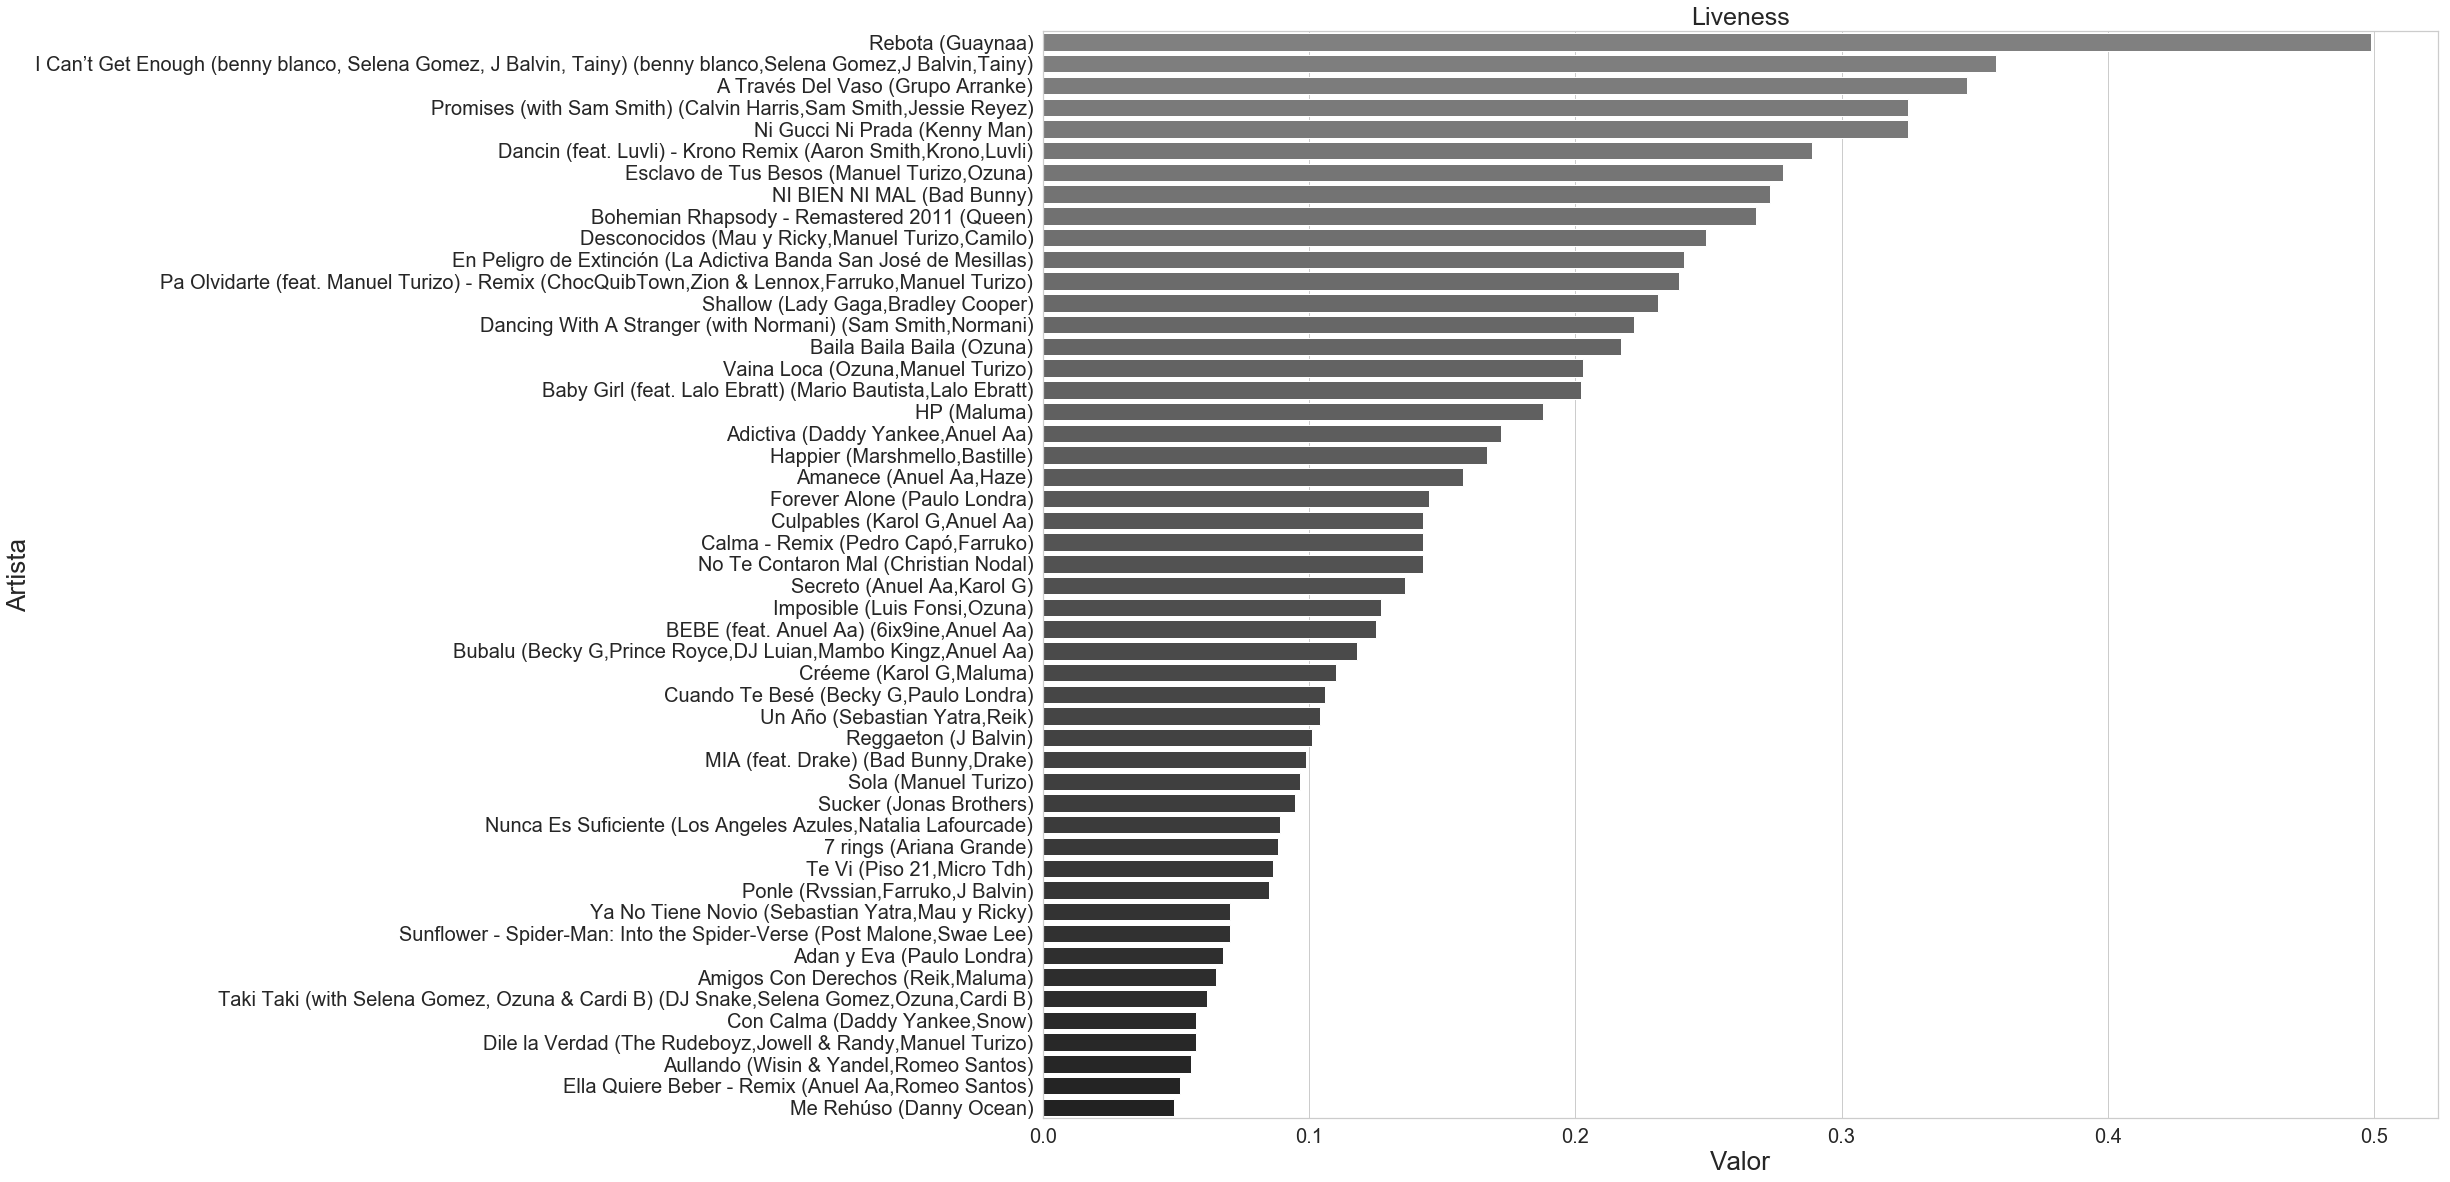

In [11]:
#liveness
grafico_atributo("liveness","gray")

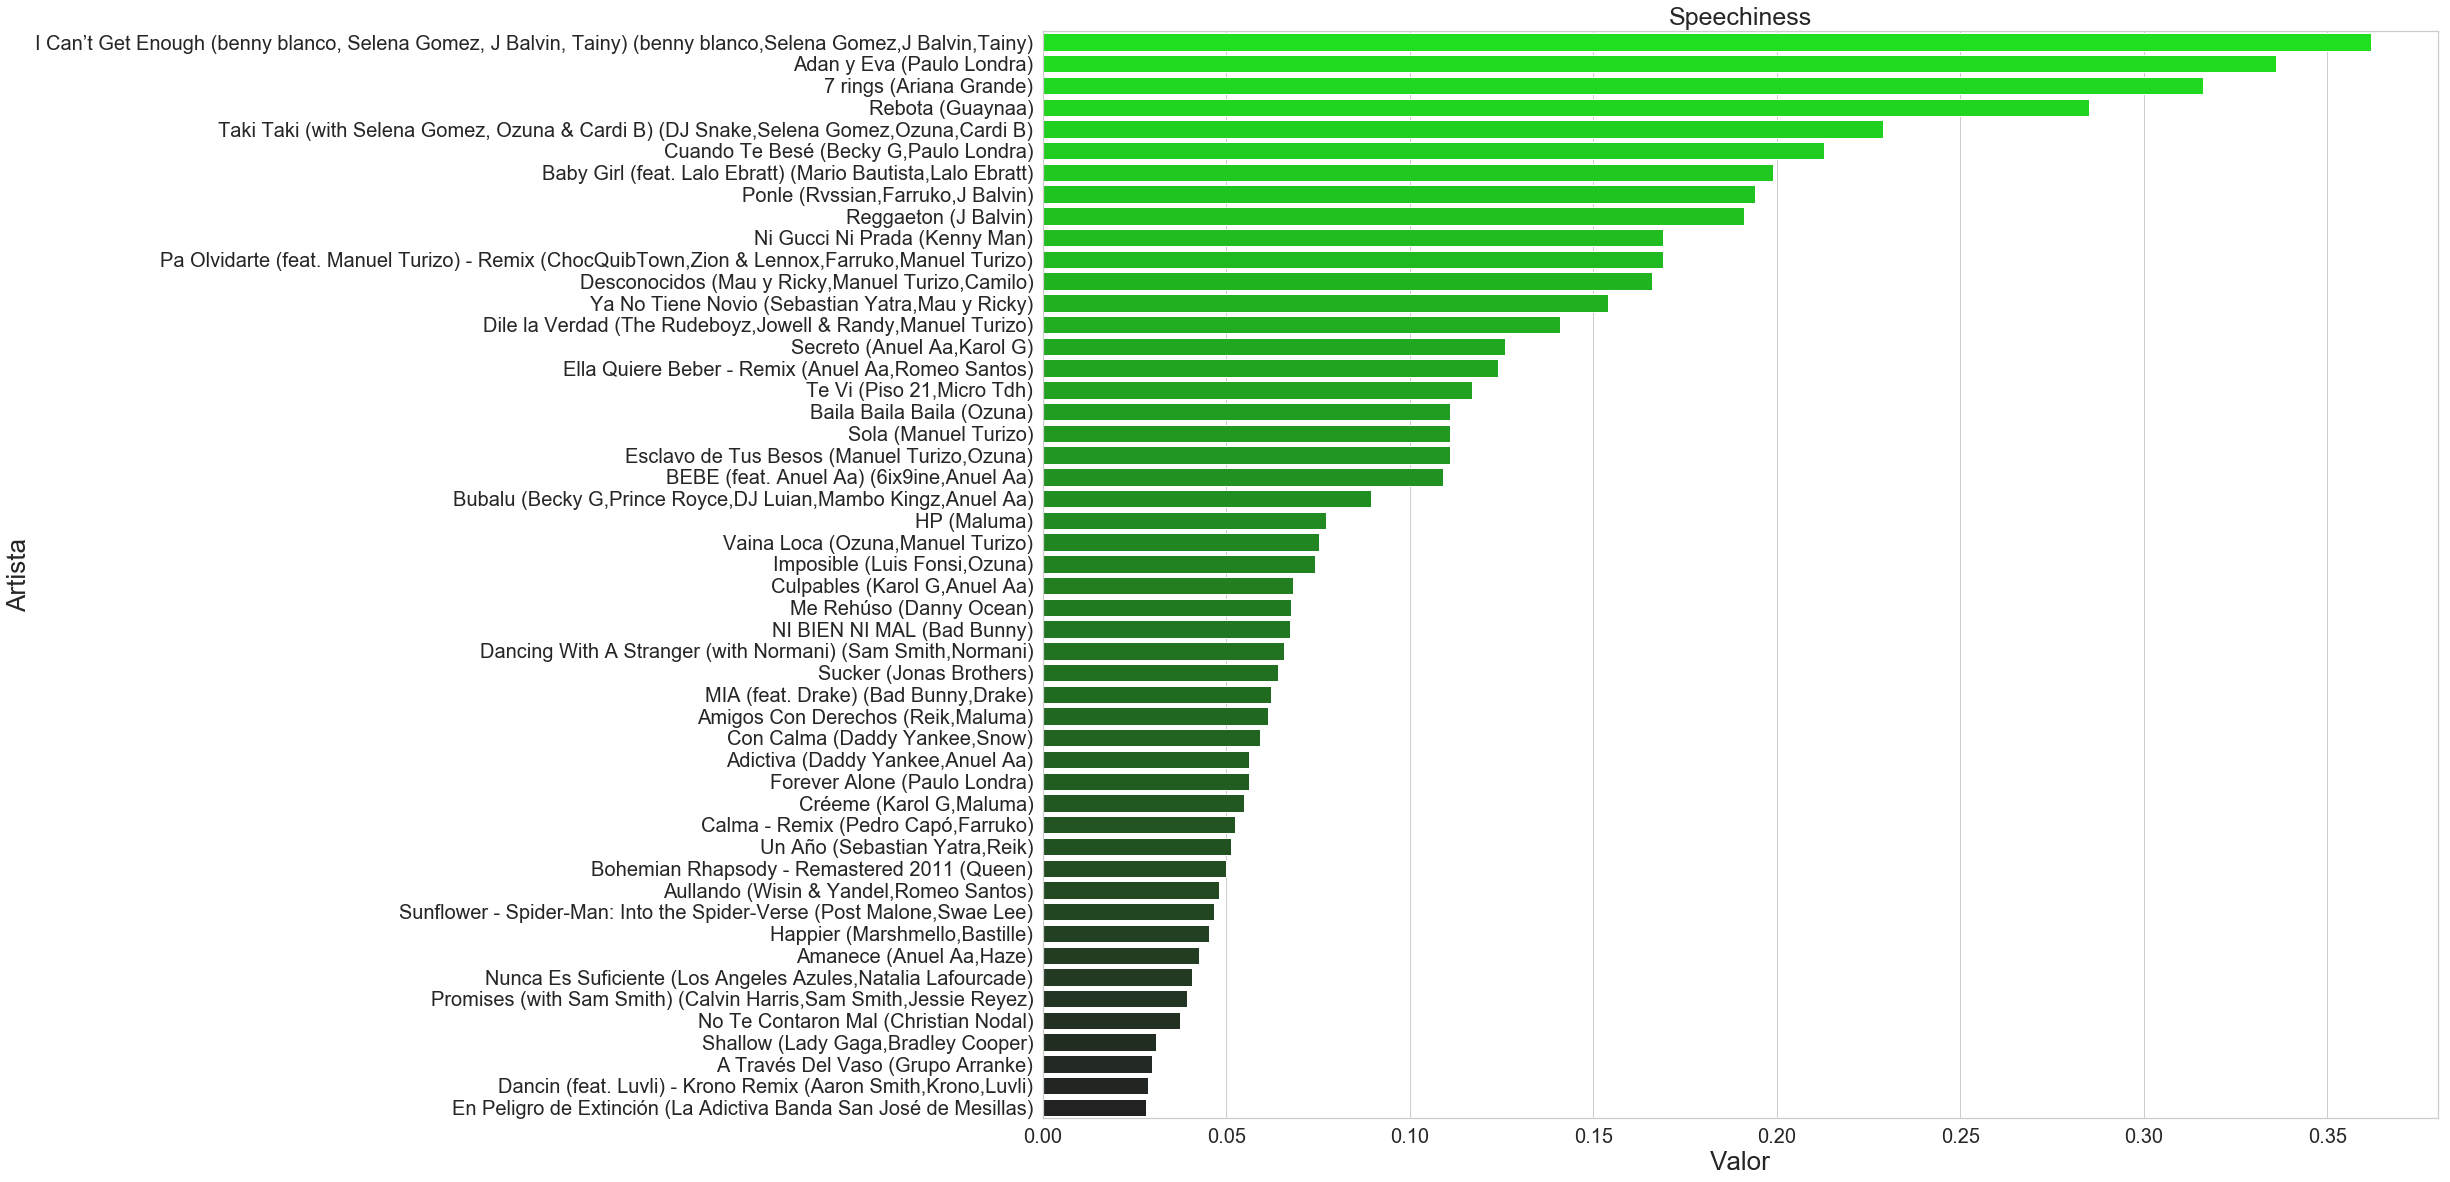

In [12]:
#speechiness
grafico_atributo("speechiness","lime")

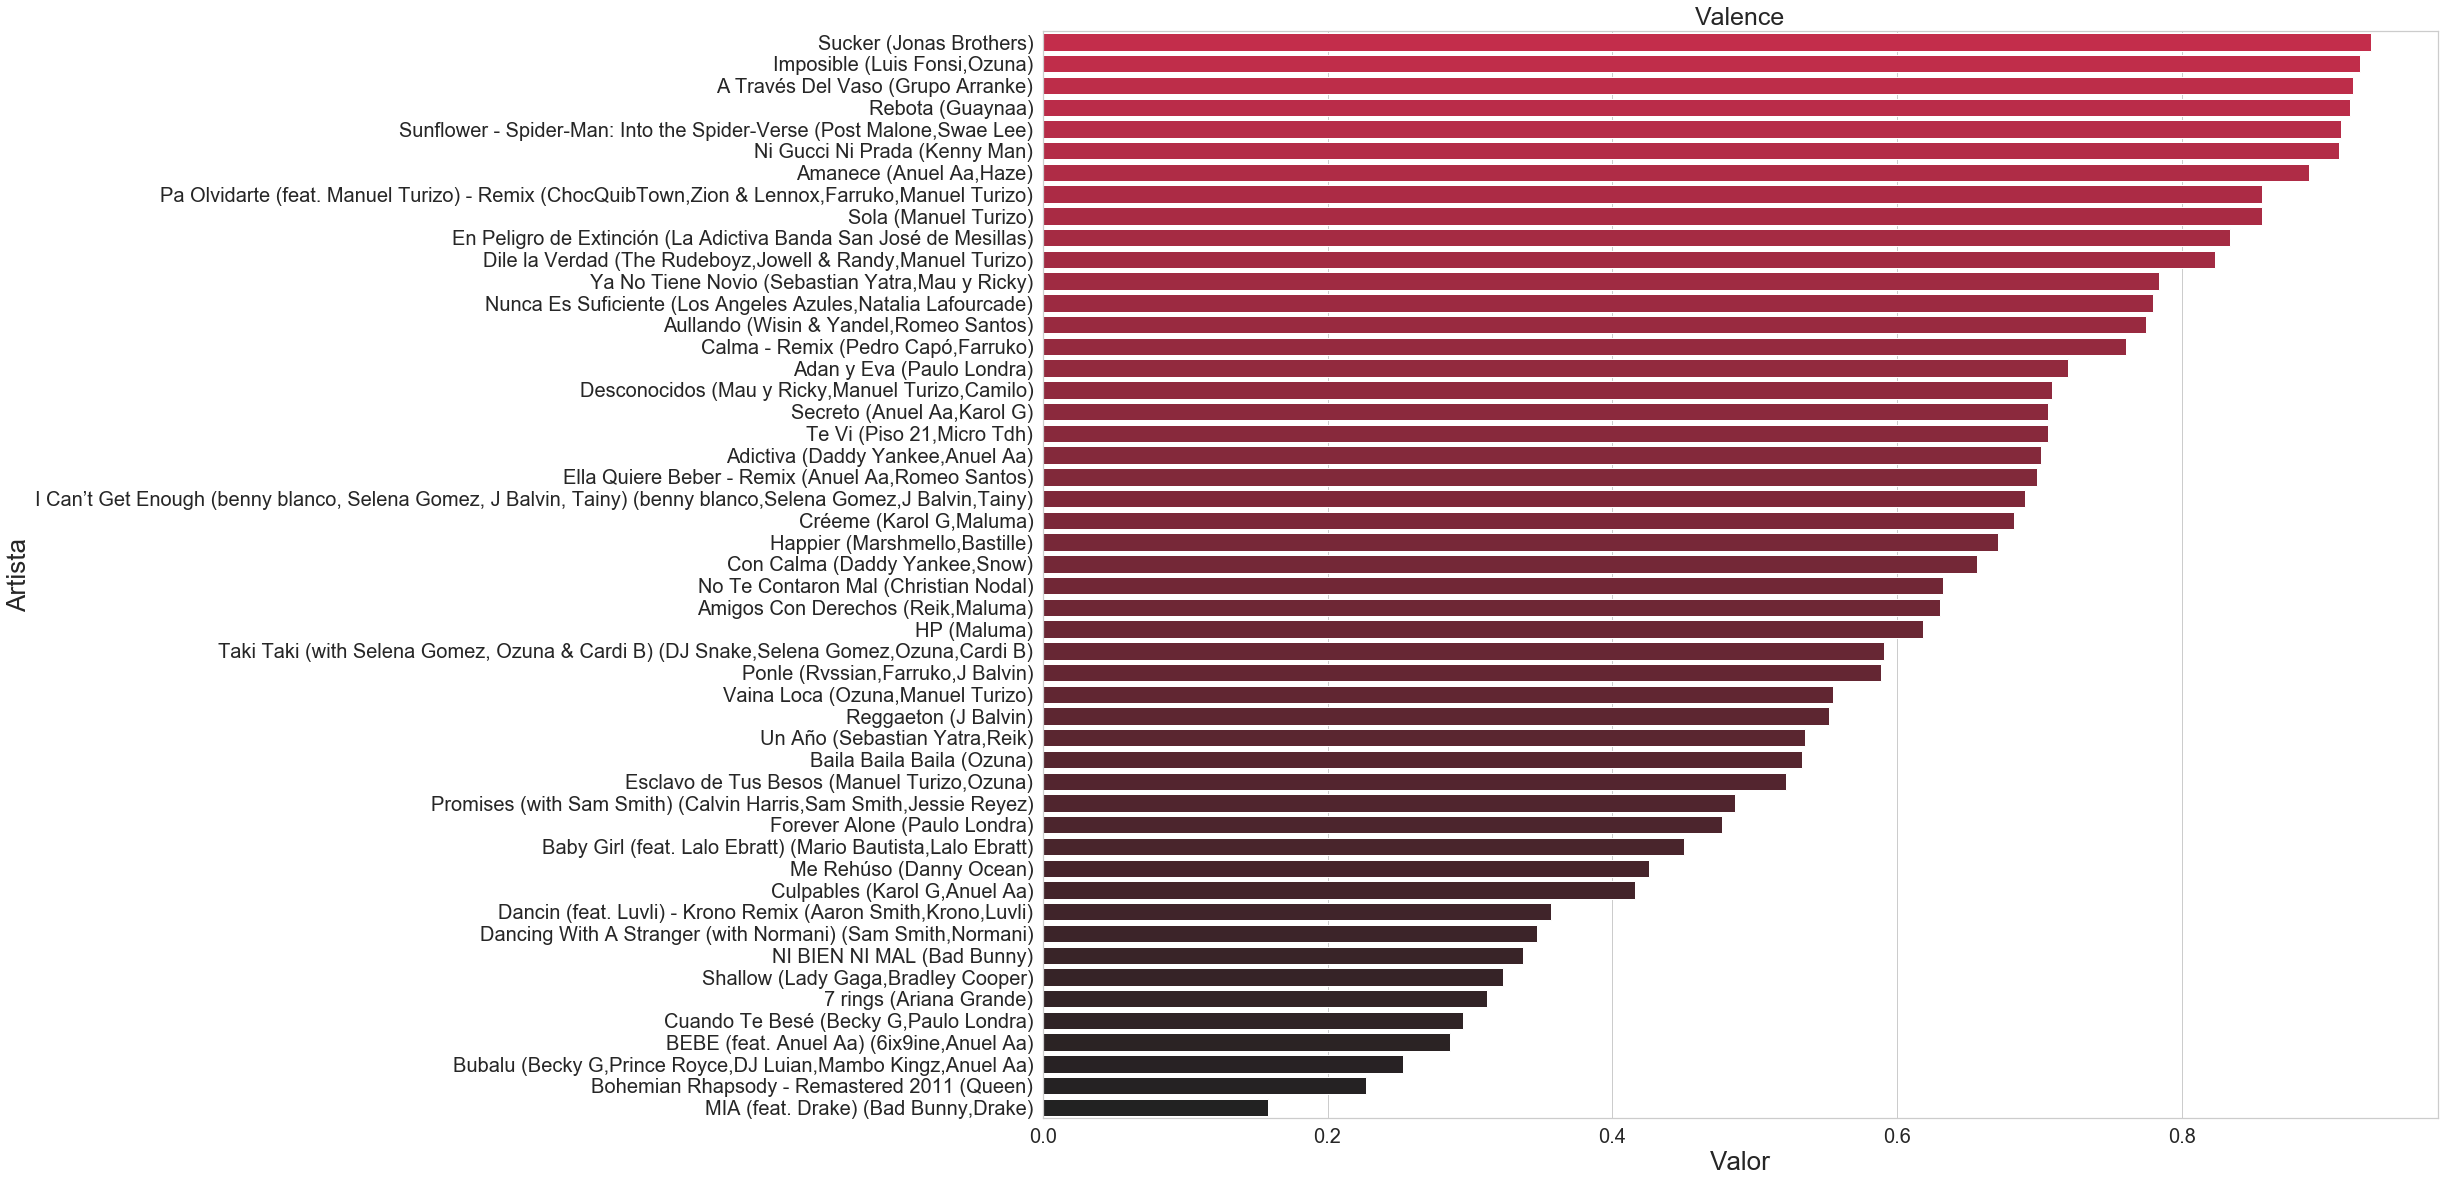

In [13]:
#valence
grafico_atributo("valence","crimson")

In [14]:
music = music.dropna(subset=['lyrics'])
music['words'] = music.lyrics.str.strip().str.split('[\W_]+')
#music['words']
rows = list()
for row in music[['words']].iterrows():
    r = row[1]
    for word in r.words:
        rows.append((word))

words = pd.DataFrame(rows, columns=['word'])

words = words[words.word.str.len() > 0]
words['word'] = words.word.str.lower()



counts = words\
    .word.value_counts()\
    .to_frame()\
    .rename(columns={'word':'n_w'})
counts




n_w
que           660
no            573
y             483
te            400
me            386
a             371
la            368
yo            290
lo            269
de            261
oh            252
el            251
i             207
tú            206
en            185
se            180
pa            145
un            143
con           139
eh            138
the           131
como          123
tu            116
you           114
es            114
ella          113
baby          111
si            108
pero          105
yeah          100
...           ...
estrujándote    1
agarrándote     1
she             1
cayeron         1
between         1
better          1
rompes          1
frenesí         1
abrigarte       1
spine           1
apruebe         1
8               1
llamada         1
asi             1
llegamos        1
tss             1
own             1
ponga           1
trajo           1
llegue          1
meternos        1
flame           1
soltar          1
capo            1
ponerme         1
savage          1
desea           1
minutos         1
skillz          1
romper          1

[2694 rows x 1 columns]

In [15]:
#import nltk
#nltk.download()
#python -m nltk.downloader <collection|package|all>
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
#from wordcloud import WordCloud

In [16]:
stopwords_spanish = stopwords.words('spanish')
stopwords_english = stopwords.words('english')

In [17]:
for a_stopword in stopwords_spanish:
    if a_stopword in counts.index:
        counts = counts.drop(a_stopword)
        
for a_stopword in stopwords_english:
    if a_stopword in counts.index:
        counts = counts.drop(a_stopword)

In [18]:
top_20 = counts.head(20)
top_20

n_w
oh         252
pa         145
eh         138
baby       111
si         108
yeah       100
yeh         85
uah         79
quiero      71
ah          61
reggaetón   60
quiere      60
baila       57
sé          57
noche       51
va          51
bebé        48
así         48
tón         48
uh          43

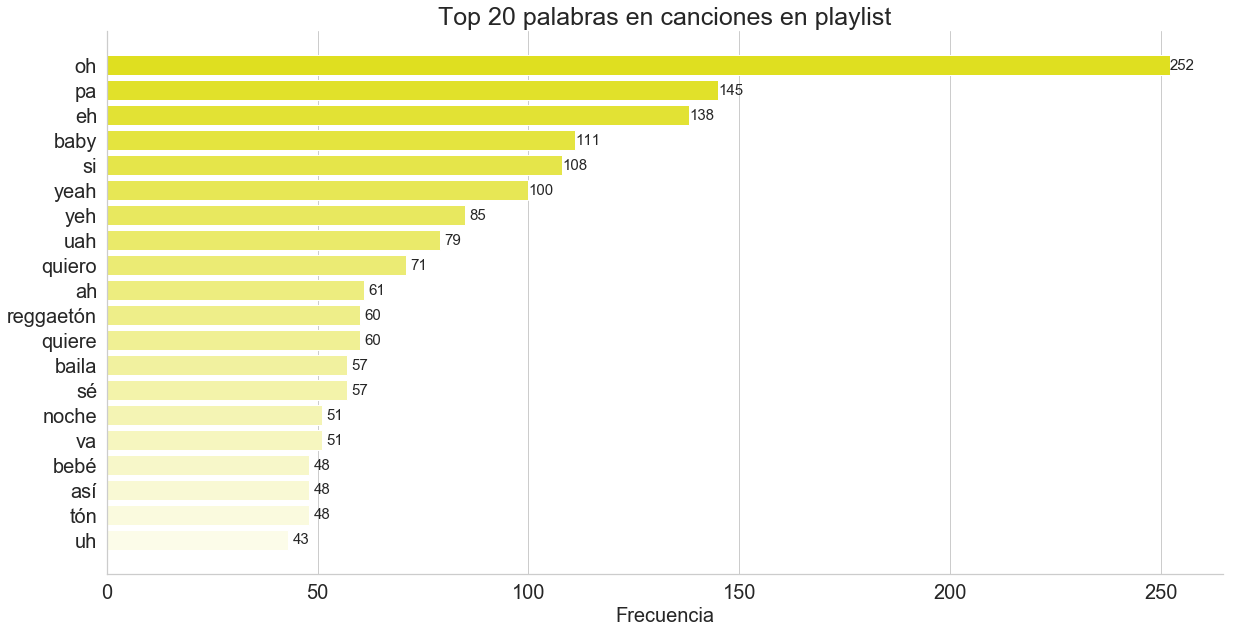

In [19]:
fig, ax = plt.subplots(figsize=(20,10))
ax = sns.barplot(x="n_w", y=top_20.index, data=top_20, palette=sns.light_palette("yellow", n_colors=20, reverse=True))
plt.ylabel("")
plt.xlabel('Frecuencia', fontsize=20)
plt.title('Top 20 palabras en canciones en playlist', fontsize=25)
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(20) 
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(20)
for p in ax.patches:
    width = p.get_width()
    ax.text(width + 3  ,
            p.get_y() + p.get_height()/1.4,
            "%d" % width,
            ha="center", fontsize=15)
sns.despine()
plt.savefig('top_words_in_songs.jpg')
plt.plot();

In [20]:
vector_genres = list()
for genre in music['artist_genres'].dropna().str.split(','):
    #vector_genres.append(genre)
    if genre:
        vector_genres += genre
vector_genres        
generos = pd.DataFrame(vector_genres, columns=['genre'])
generos        
#print(vector_genres)
#for i in set(vector_genres):
#    print(i,"--->",vector_genres.count(i))
generos = generos\
    .genre.value_counts()\
    .to_frame()\
    .rename(columns={'genre':'n_g'})

generos.head()

n_g
reggaeton     17
pop           13
latin         10
trap latino   10
latin pop      8

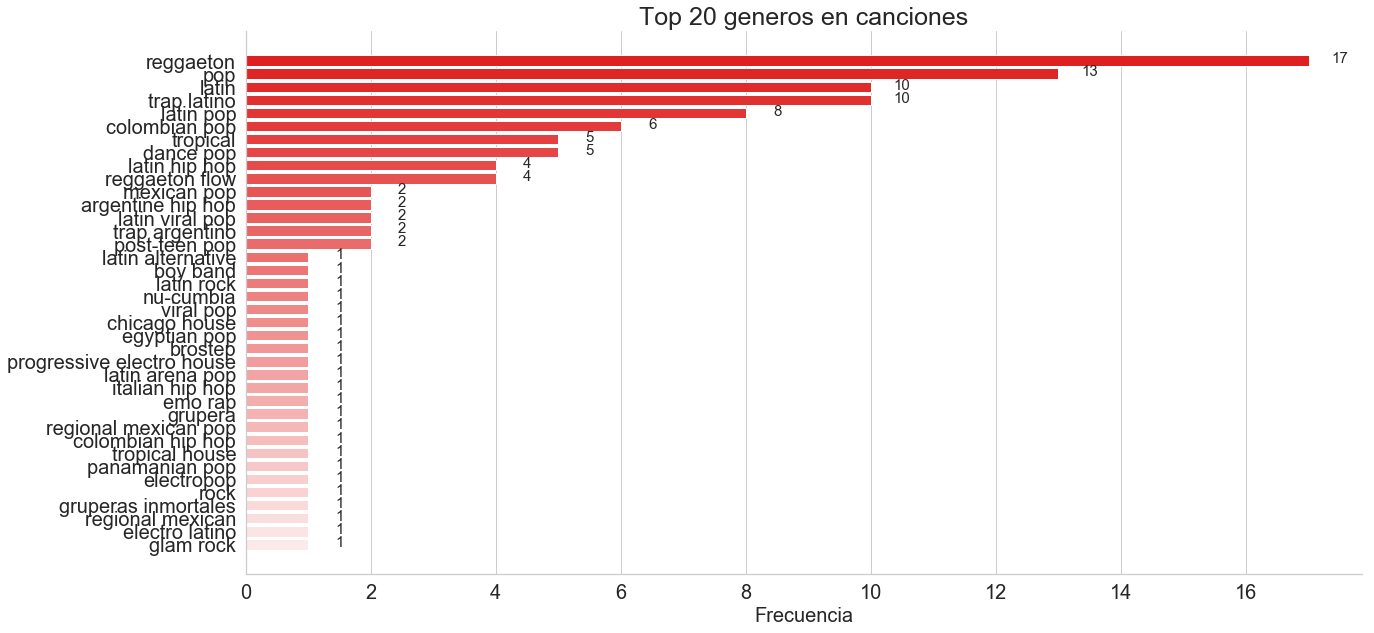

In [21]:
fig, ax = plt.subplots(figsize=(20,10))
ax = sns.barplot(x="n_g", y=generos.index, data=generos, palette=sns.light_palette("red", n_colors=len(generos), reverse=True))
plt.ylabel("")
plt.xlabel('Frecuencia', fontsize=20)
plt.title('Top 20 generos en canciones', fontsize=25)
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(20) 
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(20)
for p in ax.patches:
    width = p.get_width()
    ax.text(width + 0.5  ,
            p.get_y() + p.get_height()/1.4,
            "%d" % width,
            ha="center", fontsize=15)
sns.despine()
plt.savefig('top_generos.jpg')
plt.plot();

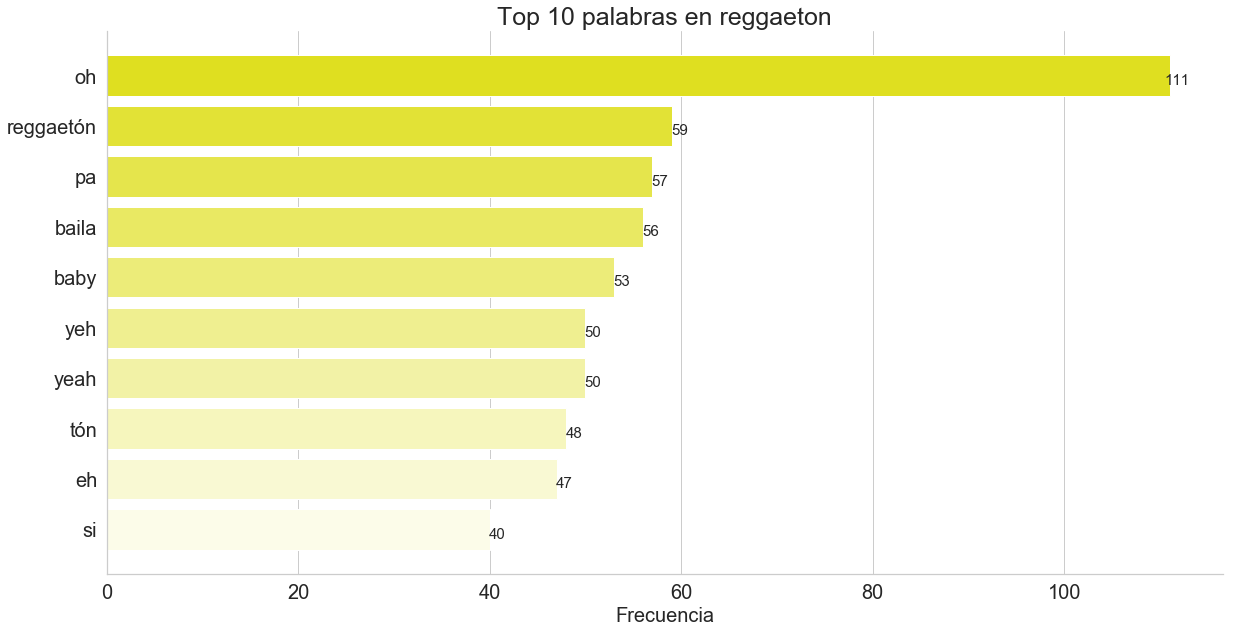

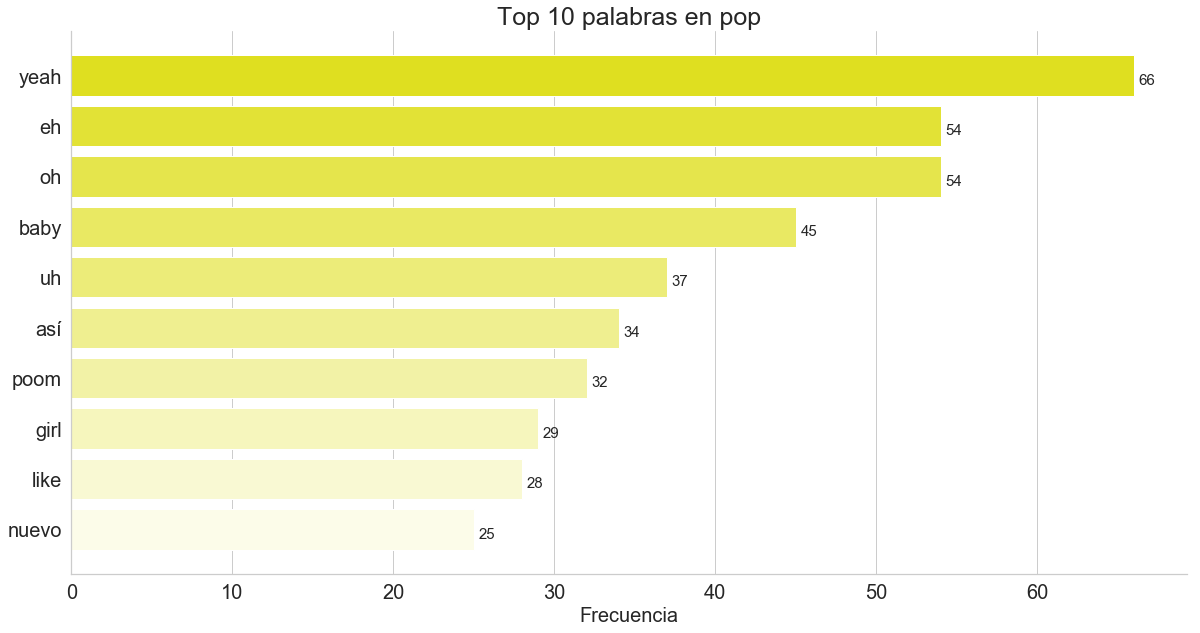

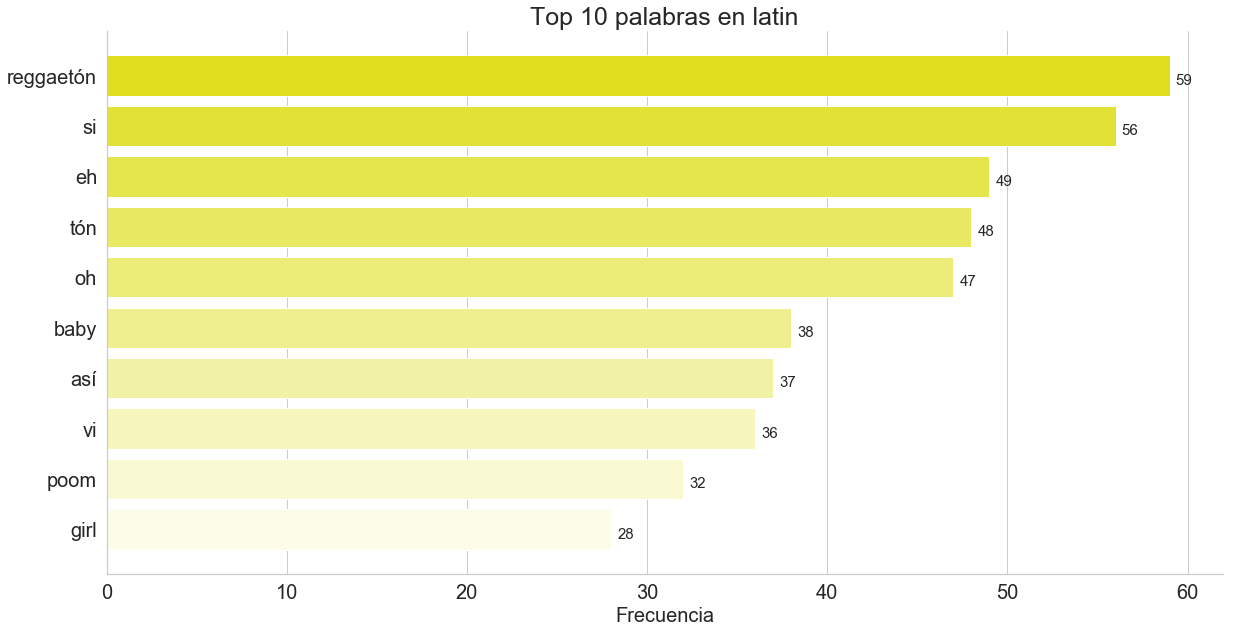

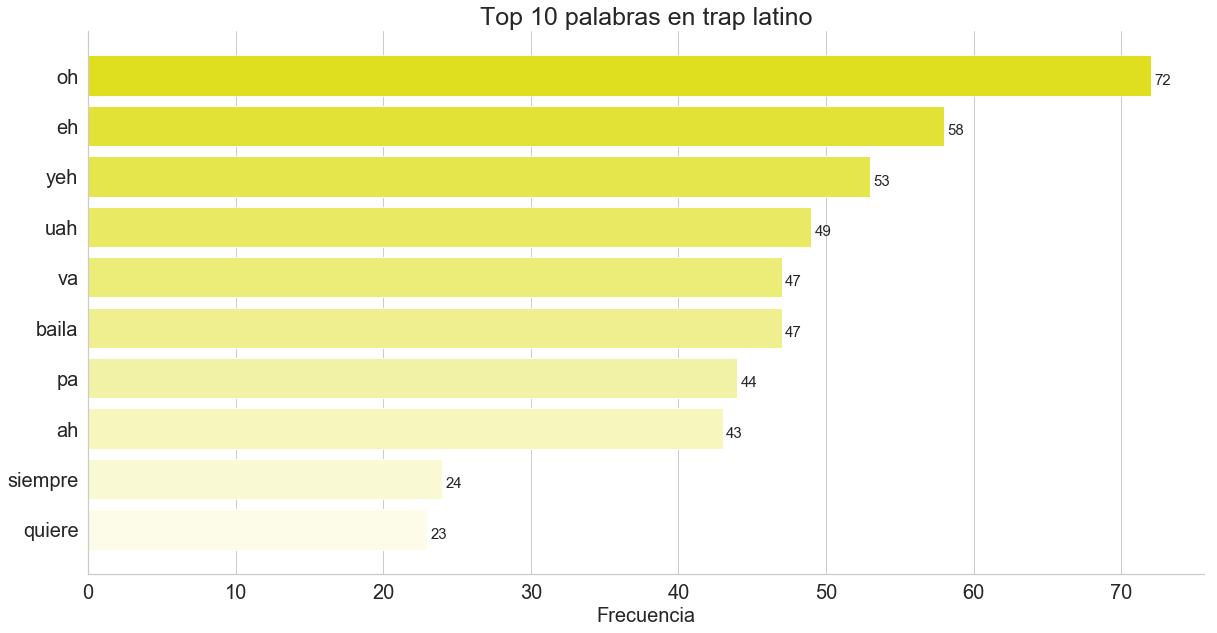

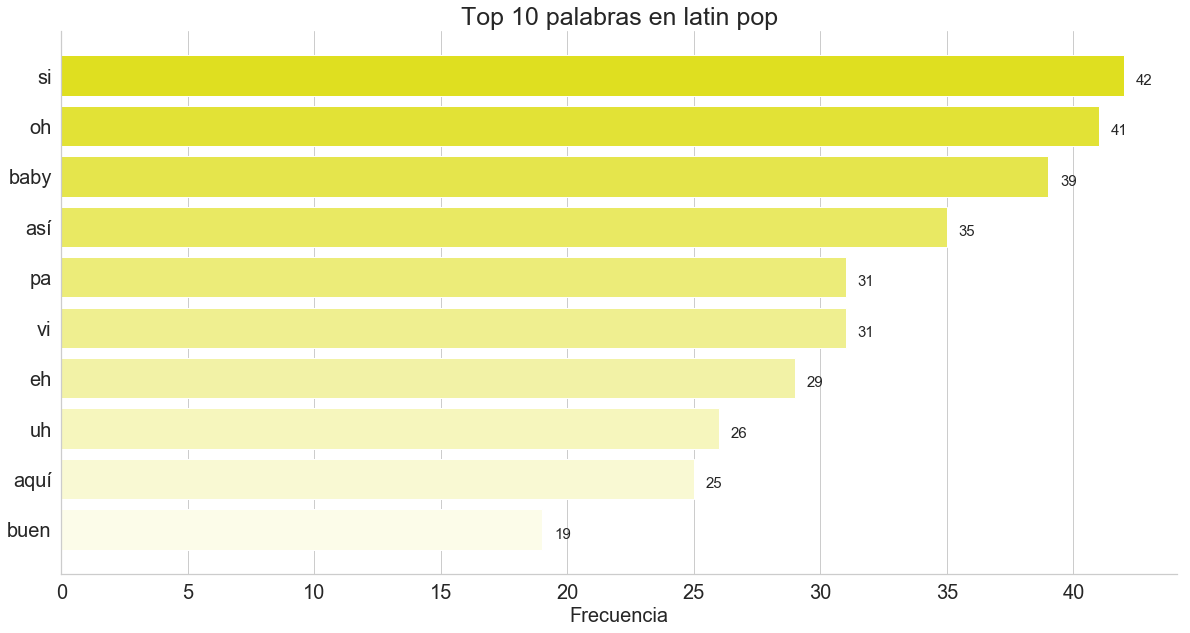

In [22]:
# palabras más comunes por genero

words_by_genre = pd.DataFrame()
for row in music[['artist_genres','words']].dropna().iterrows():
    genre = row[1].artist_genres.split(',')
    words = row[1].words
    for g in genre:
        words_by_genre = words_by_genre.append({'genre':g,'words':words},ignore_index=True)

df_wbg = words_by_genre.groupby(['genre']).apply(lambda x: x['words'].sum())
df = pd.concat([df_wbg,generos], axis=1, sort=True).sort_values(by=['n_g'], ascending=False)[:5] # primeros 5
#df = pd.concat([df_wbg,generos], axis=1, sort=True).sort_values(by=['n_g'], ascending=False)[-5:] # ultimos 5

for i, v in df[0].items():
    #print(i,v)
    rows = list()
    for word in v:
        rows.append((word))
    words = pd.DataFrame(rows, columns=['word'])
    words = words[words.word.str.len() > 0]
    words['word'] = words.word.str.lower()
    counts = words\
        .word.value_counts()\
        .to_frame()\
        .rename(columns={'word':'n_w'})
    
    for a_stopword in stopwords_spanish:
        if a_stopword in counts.index:
            counts = counts.drop(a_stopword)

    for a_stopword in stopwords_english:
        if a_stopword in counts.index:
            counts = counts.drop(a_stopword)    
    #print("-"*40)
    #print(i)
    #print(counts.head(10))
    counts = counts.head(10)
    fig, ax = plt.subplots(figsize=(20,10))
    ax = sns.barplot(x="n_w", y=counts.index, data=counts, palette=sns.light_palette("yellow", n_colors=10, reverse=True))
    plt.ylabel("")
    plt.xlabel('Frecuencia', fontsize=20)
    plt.title('Top 10 palabras en ' + i, fontsize=25)
    for tick in ax.xaxis.get_major_ticks():
        tick.label.set_fontsize(20) 
    for tick in ax.yaxis.get_major_ticks():
        tick.label.set_fontsize(20)
    for p in ax.patches:
        width = p.get_width()
        ax.text(width + 0.8  ,
                p.get_y() + p.get_height()/1.4,
                "%d" % width,
                ha="center", fontsize=15)
    sns.despine()
    plt.plot();    
    
    


In [25]:
# calculando otra vez densidad lyrica y léxica
music['duration_s'] = music['duration_ms']/1000.0
#music['amount_of_words'] = music['words'].str.len()
#music['lyric_density'] = music['amount_of_words']/music['duration_s']
stopset = set(stopwords_spanish + stopwords_english)
music['tokens'] = pd.Series(dtype=object)
for index, row in music.iterrows():
    try:
        #print(row['lyrics'])
        tokens = word_tokenize(row['lyrics'])
        tokens_wo_stopwords = [word for word in tokens if not word in stopset]
        music.at[index, 'tokens'] = tokens_wo_stopwords
        music.at[index, 'le_d'] = ( len(tokens_wo_stopwords) / len(tokens) ) * 100
        music.at[index, 'ly_d'] = len(tokens) / row['duration_s']
        music.at[index, 'n_words'] = len(tokens)
        music.at[index, 'n_words_no_rep'] = len(list(set(tokens)))
    except: # songs without lyrics throw exceptions, i'm lazy
        continue

music['le_d'] = music['le_d'].fillna(0)
music['ly_d'] = music['ly_d'].fillna(0)

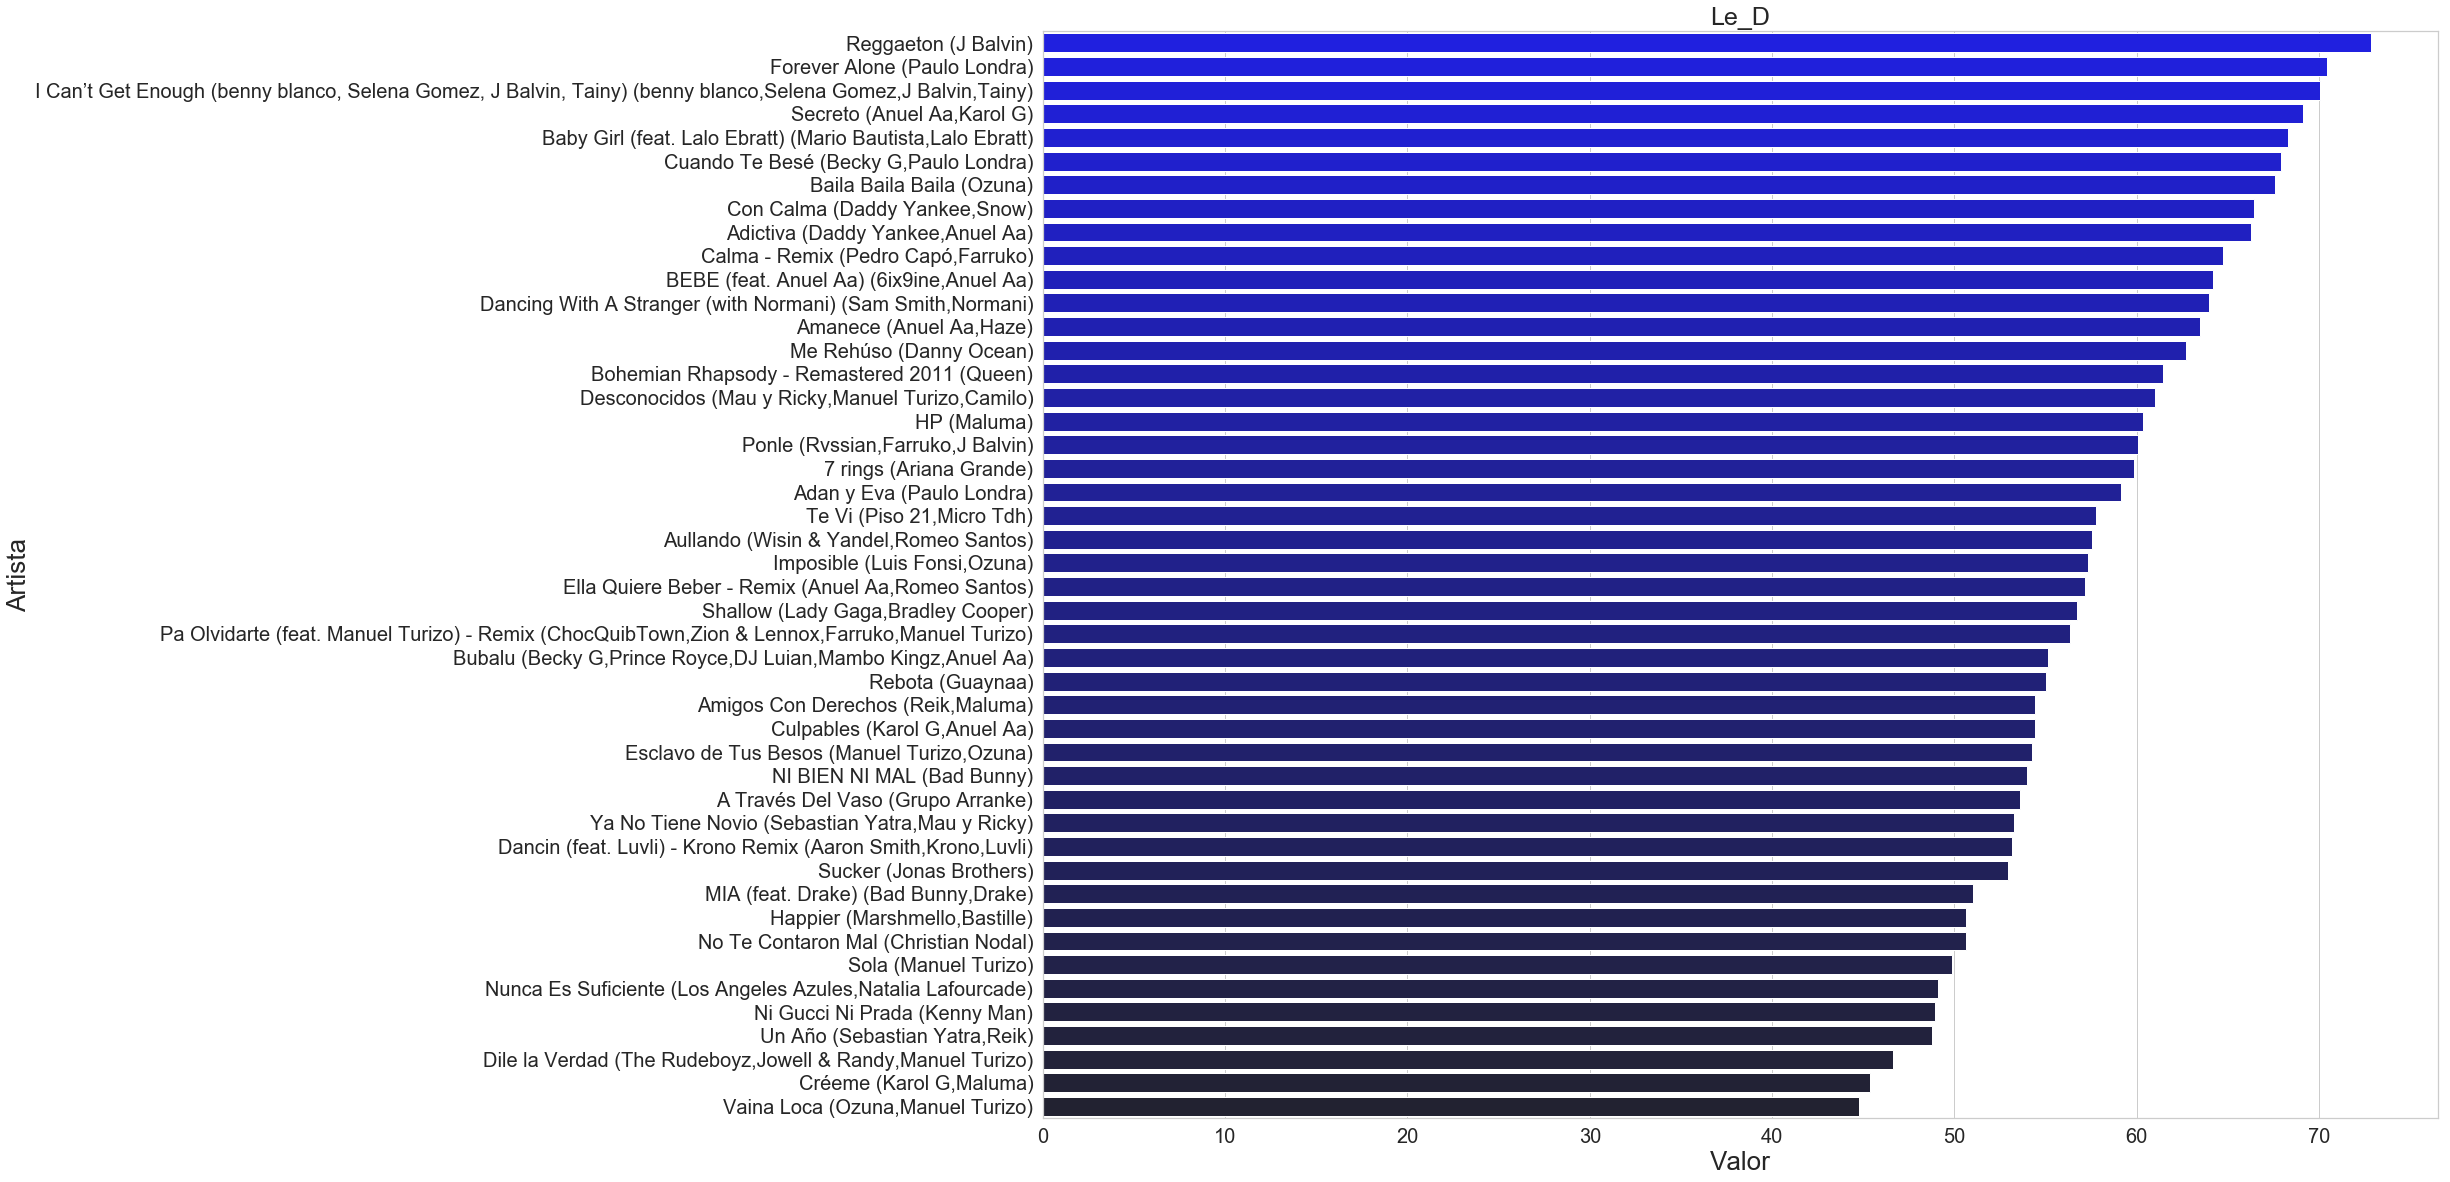

In [26]:
# DENSIDAD LÉXICA
grafico_atributo("le_d","blue")

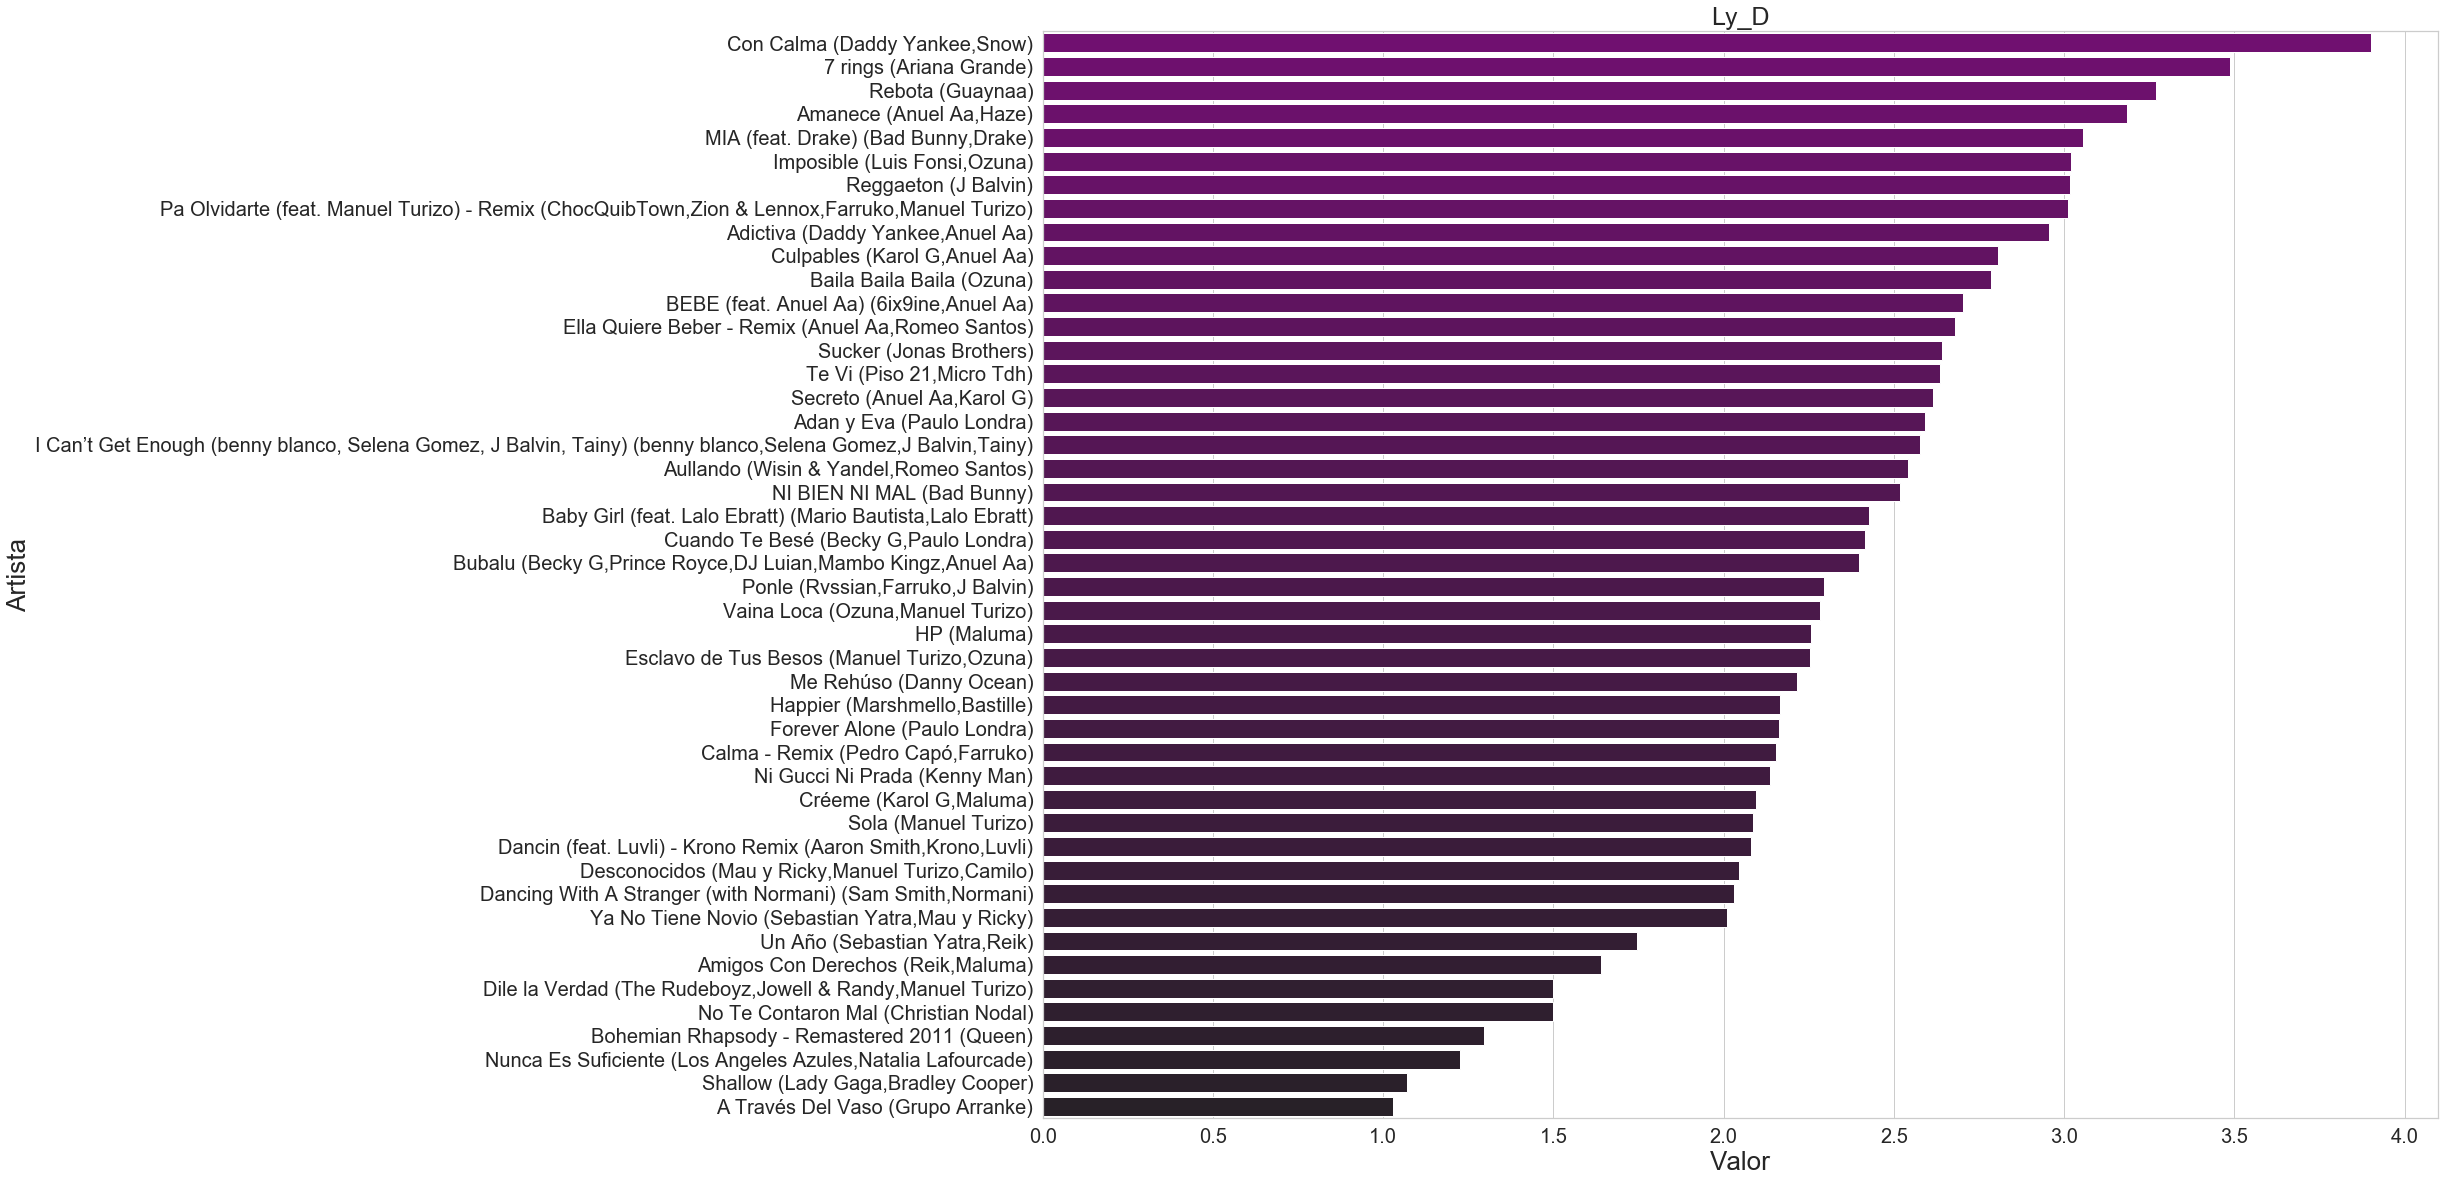

In [30]:
grafico_atributo("ly_d","purple")

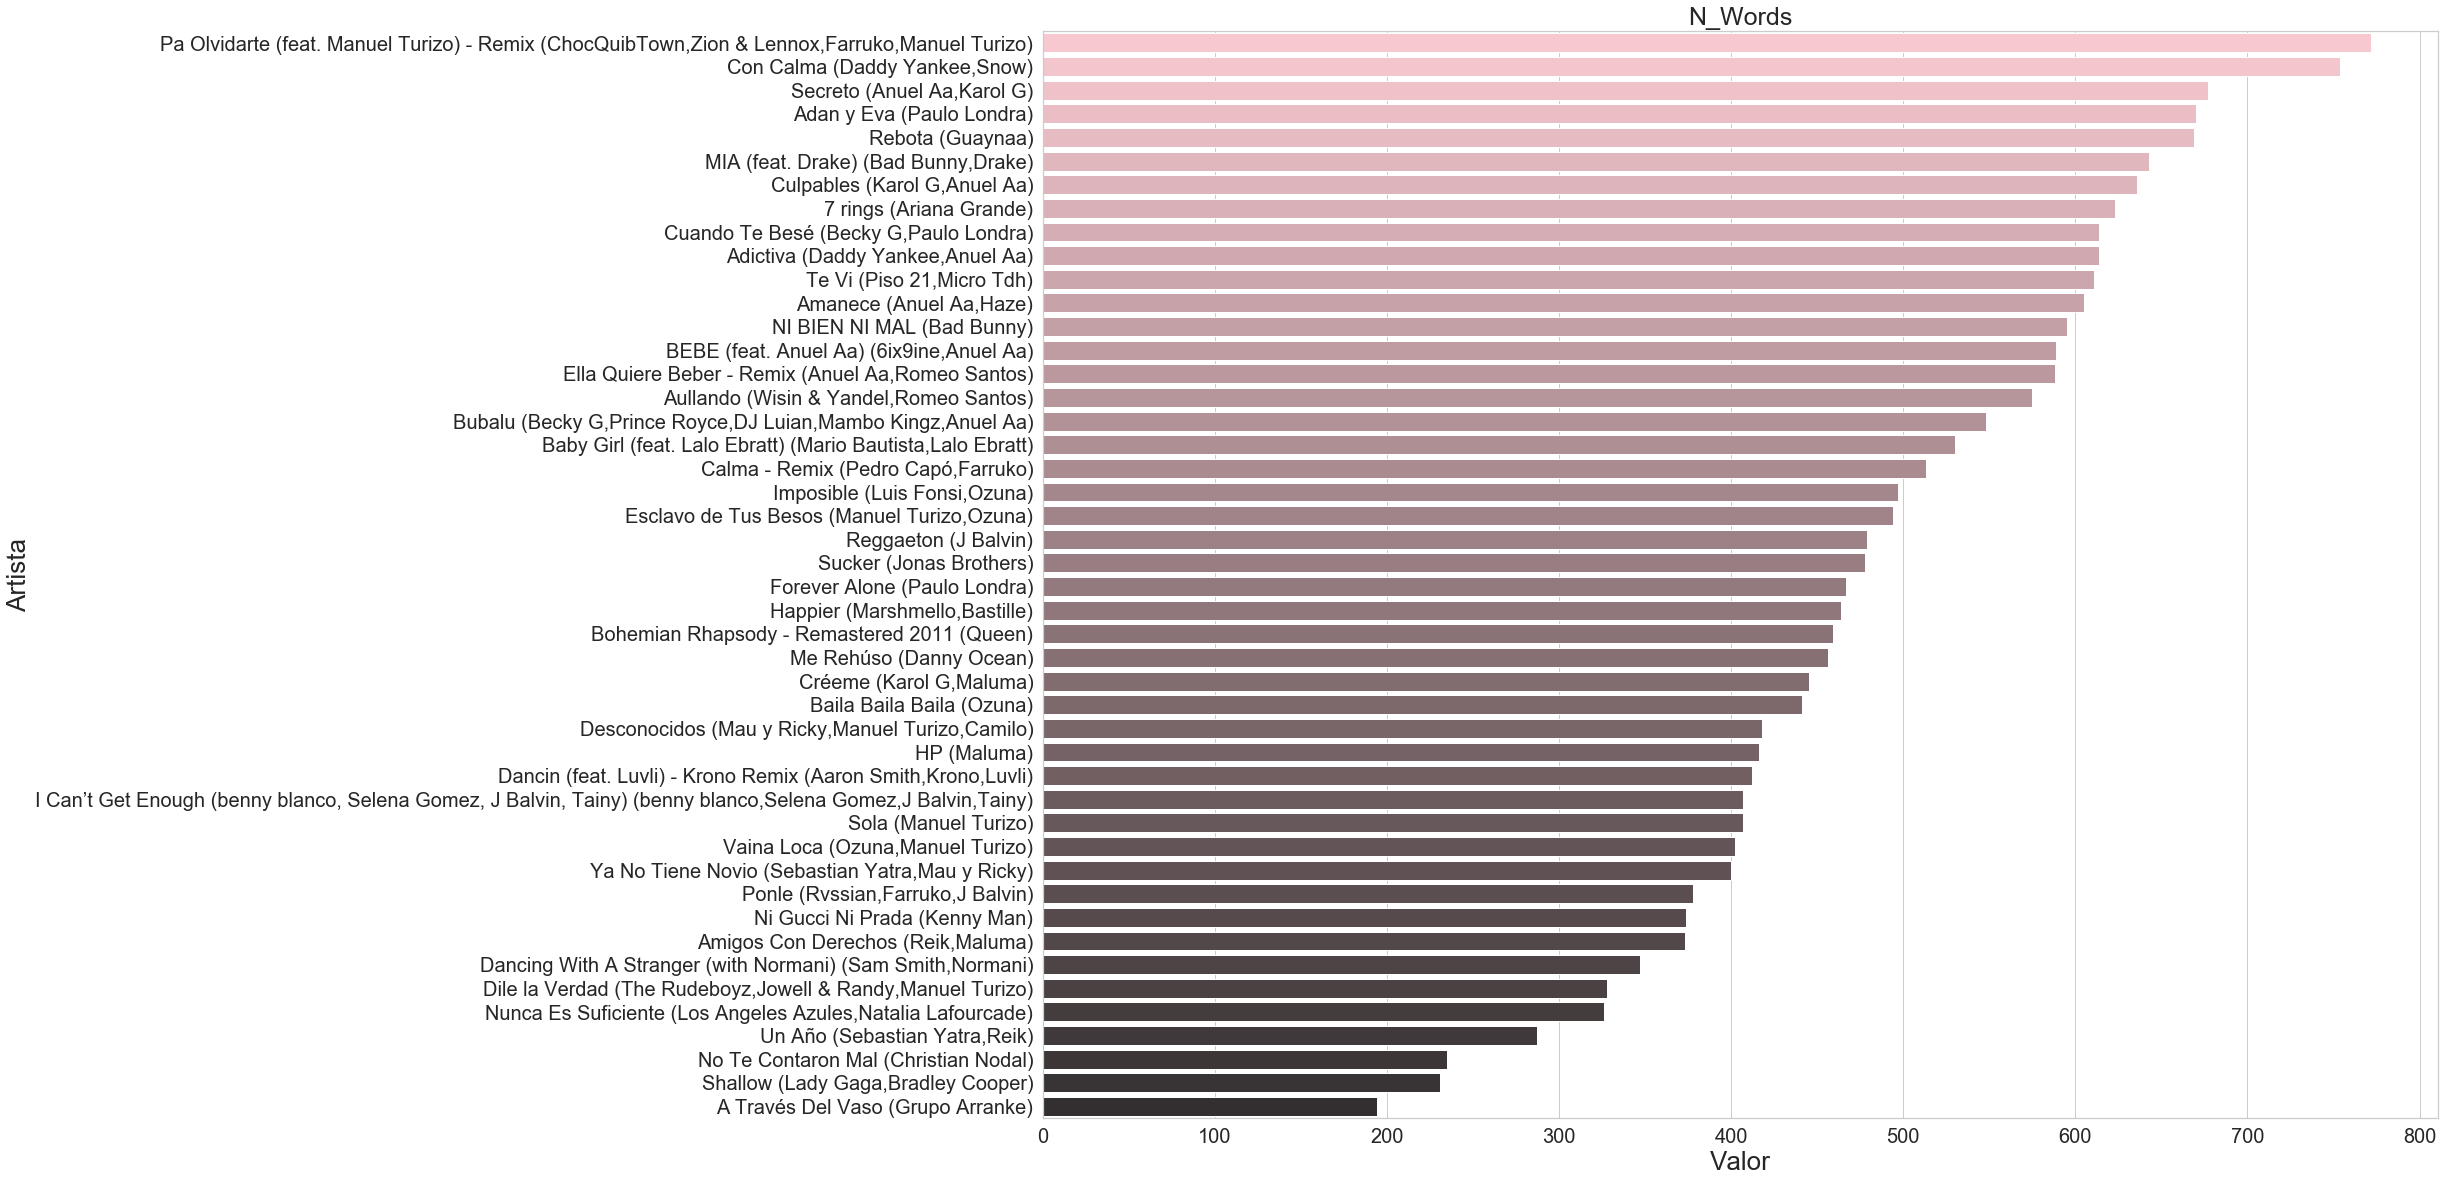

In [31]:
grafico_atributo("n_words","pink")

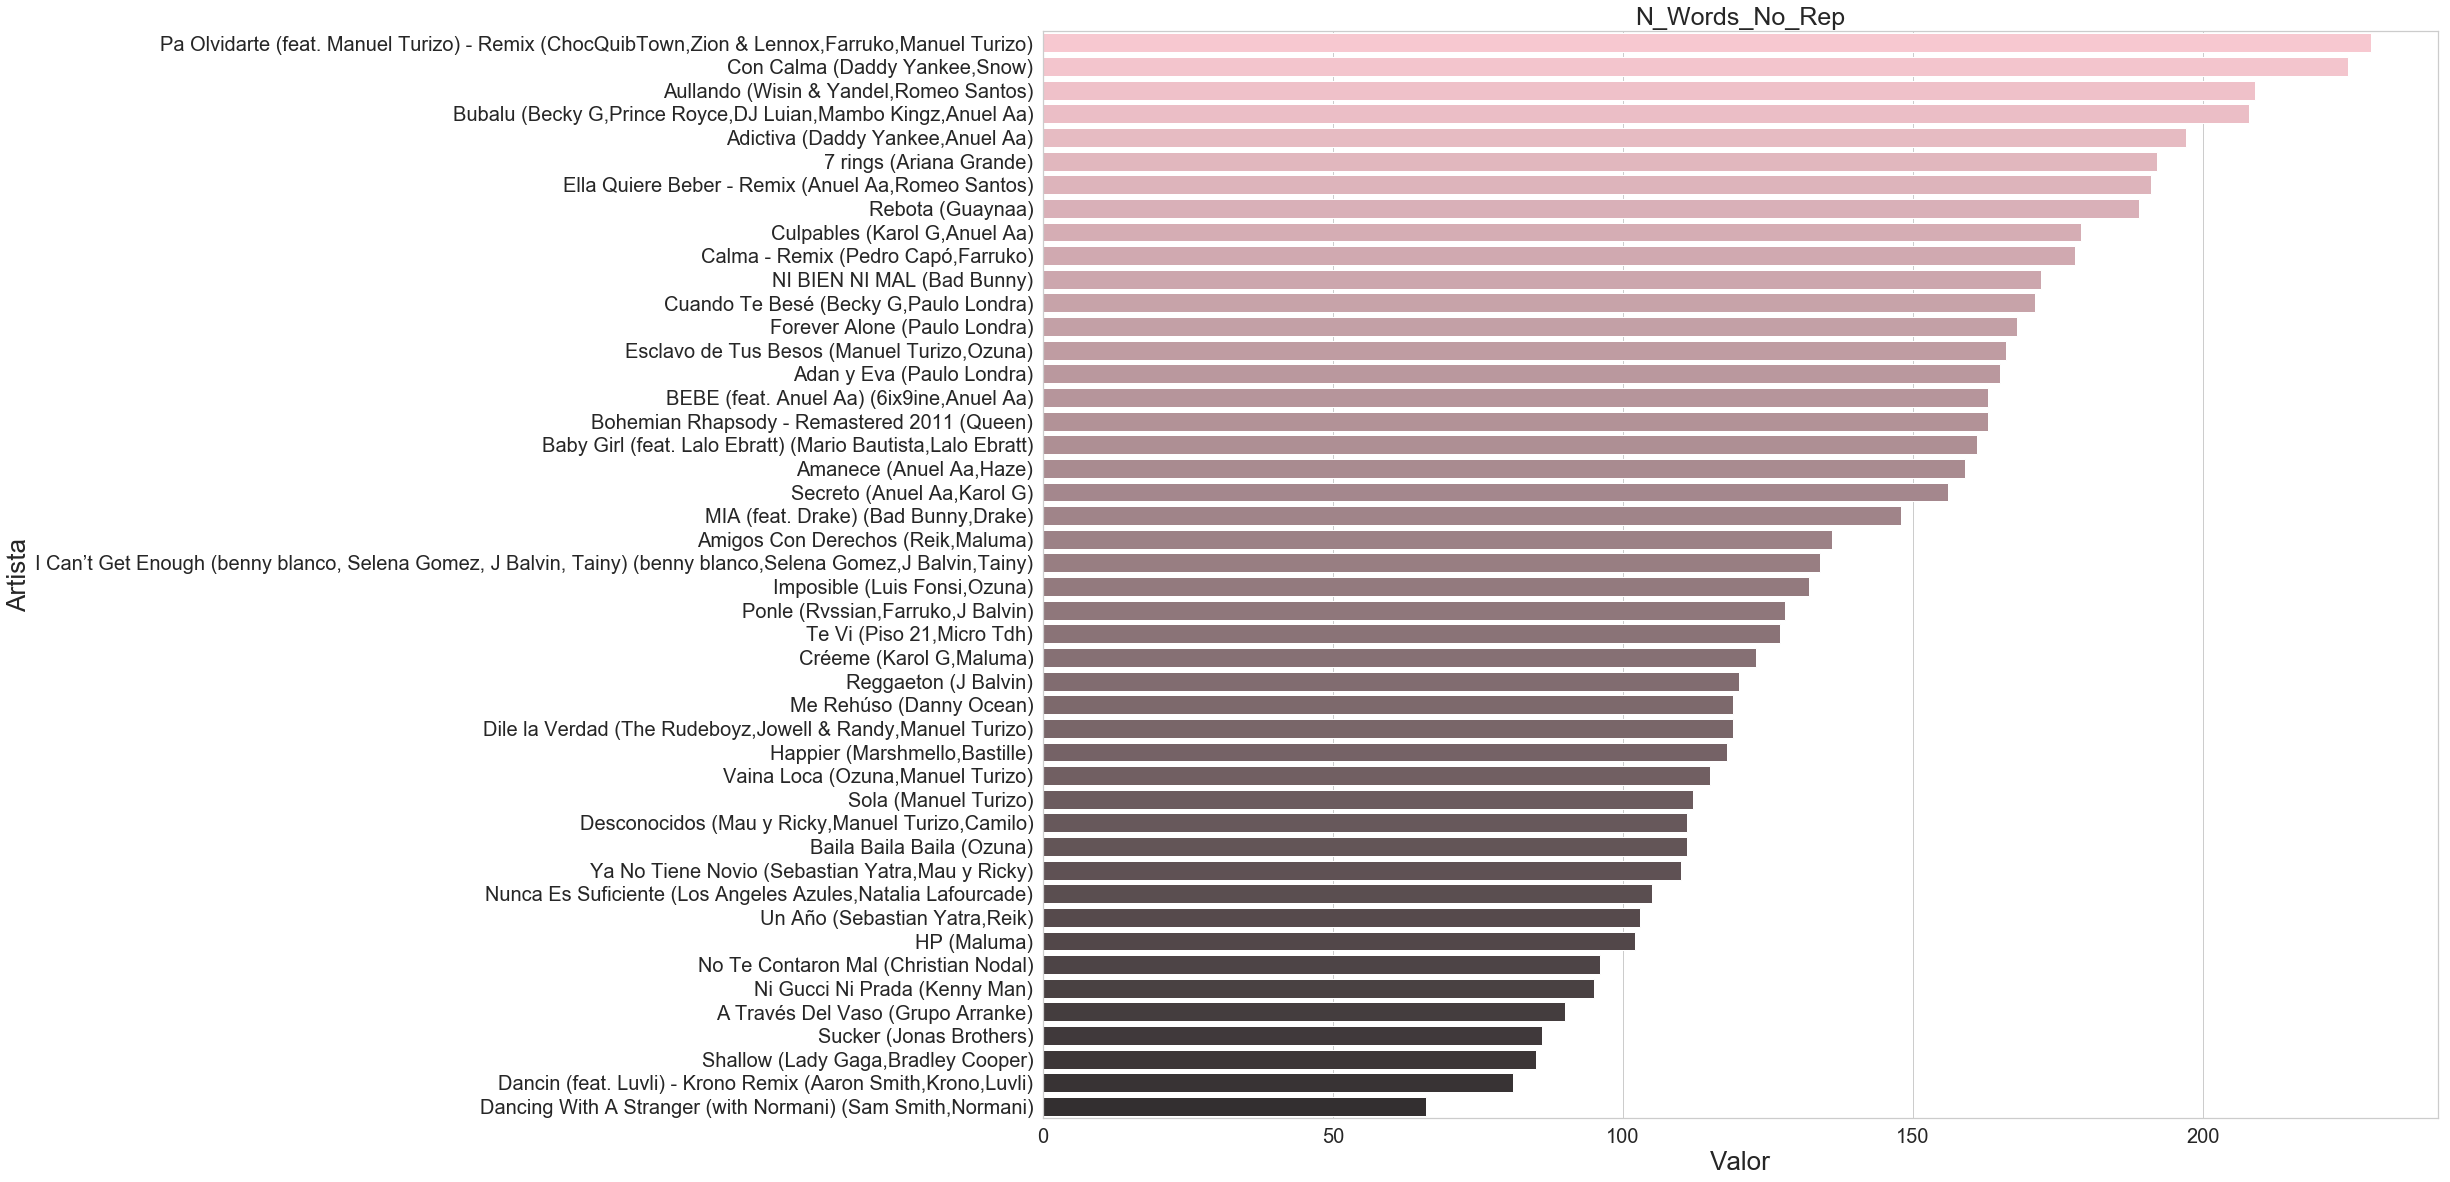

In [32]:
grafico_atributo("n_words_no_rep","pink")

In [33]:
words_by_genre = pd.DataFrame()
for row in music[['artist_genres','lyrics','duration_s']].dropna().iterrows():
    #print(row)
    genre = row[1].artist_genres.split(',')
    lyrics = row[1].lyrics
    duration_s = row[1].duration_s
    for g in genre:
        words_by_genre = words_by_genre.append({'genre':g,'lyrics':lyrics,'duration_s':duration_s},ignore_index=True)

#print(words_by_genre.head(10))
df_wbg = words_by_genre.groupby(['genre']).apply(lambda x: x['lyrics'].sum())
df_time = words_by_genre.groupby(['genre']).apply(lambda x: x['duration_s'].mean())
df = pd.concat([df_wbg,generos,df_time ], axis=1, sort=True).sort_values(by=['n_g'], ascending=False)[:5] # primeros 5
#print(df.head(5))

df['tokens'] = pd.Series(dtype=object)
for index, row in df.iterrows():
    try:
        tokens = word_tokenize(row[0])
        #print(tokens)
        tokens_wo_stopwords = [word for word in tokens if not word in stopset]
        df.at[index, 'tokens'] = tokens_wo_stopwords
        df.at[index, 'le_d'] = ( len(tokens_wo_stopwords) / len(tokens) ) * 100
        df.at[index, 'ly_d'] = len(tokens) / row[1]
        df.at[index, 'n_words'] = len(tokens)
        df.at[index, 'n_words_no_rep'] = len(list(set(tokens)))
    except: # songs without lyrics throw exceptions, i'm lazy
        continue


df['le_d'] = df['le_d'].fillna(0)
df['ly_d'] = df['ly_d'].fillna(0)
df

0  n_g  \
reggaeton    d-d-d-d-d-dy play n' skillz ¡run! ¿cómo te lla...   17   
pop          d-d-d-d-d-dy play n' skillz ¡run! ¿cómo te lla...   13   
latin        d-d-d-d-d-dy play n' skillz ¡run! ¿cómo te lla...   10   
trap latino  (bebecita) (bebe-bebecita), uah bebecita lo de...   10   
latin pop    laramercy gang welcome to the paradise ¡farru!...    8   

                      1                                             tokens  \
reggaeton    207.127412  [d-d-d-d-d-dy, play, n, ', skillz, ¡run, !, ¿c...   
pop          199.276154  [d-d-d-d-d-dy, play, n, ', skillz, ¡run, !, ¿c...   
latin        207.652300  [d-d-d-d-d-dy, play, n, ', skillz, ¡run, !, ¿c...   
trap latino  208.864600  [(, bebecita, ), (, bebe-bebecita, ), ,, uah, ...   
latin pop    218.389125  [laramercy, gang, welcome, paradise, ¡farru, !...   

                  le_d       ly_d  n_words  n_words_no_rep  
reggaeton    58.392435  42.886646   8883.0          1402.0  
pop          61.665617  31.875364   6352.0          1157.0  
latin        61.370604  26.703292   5545.0          1024.0  
trap latino  59.732650  26.146125   5461.0           899.0  
latin pop    60.259179  19.080620   4167.0           773.0

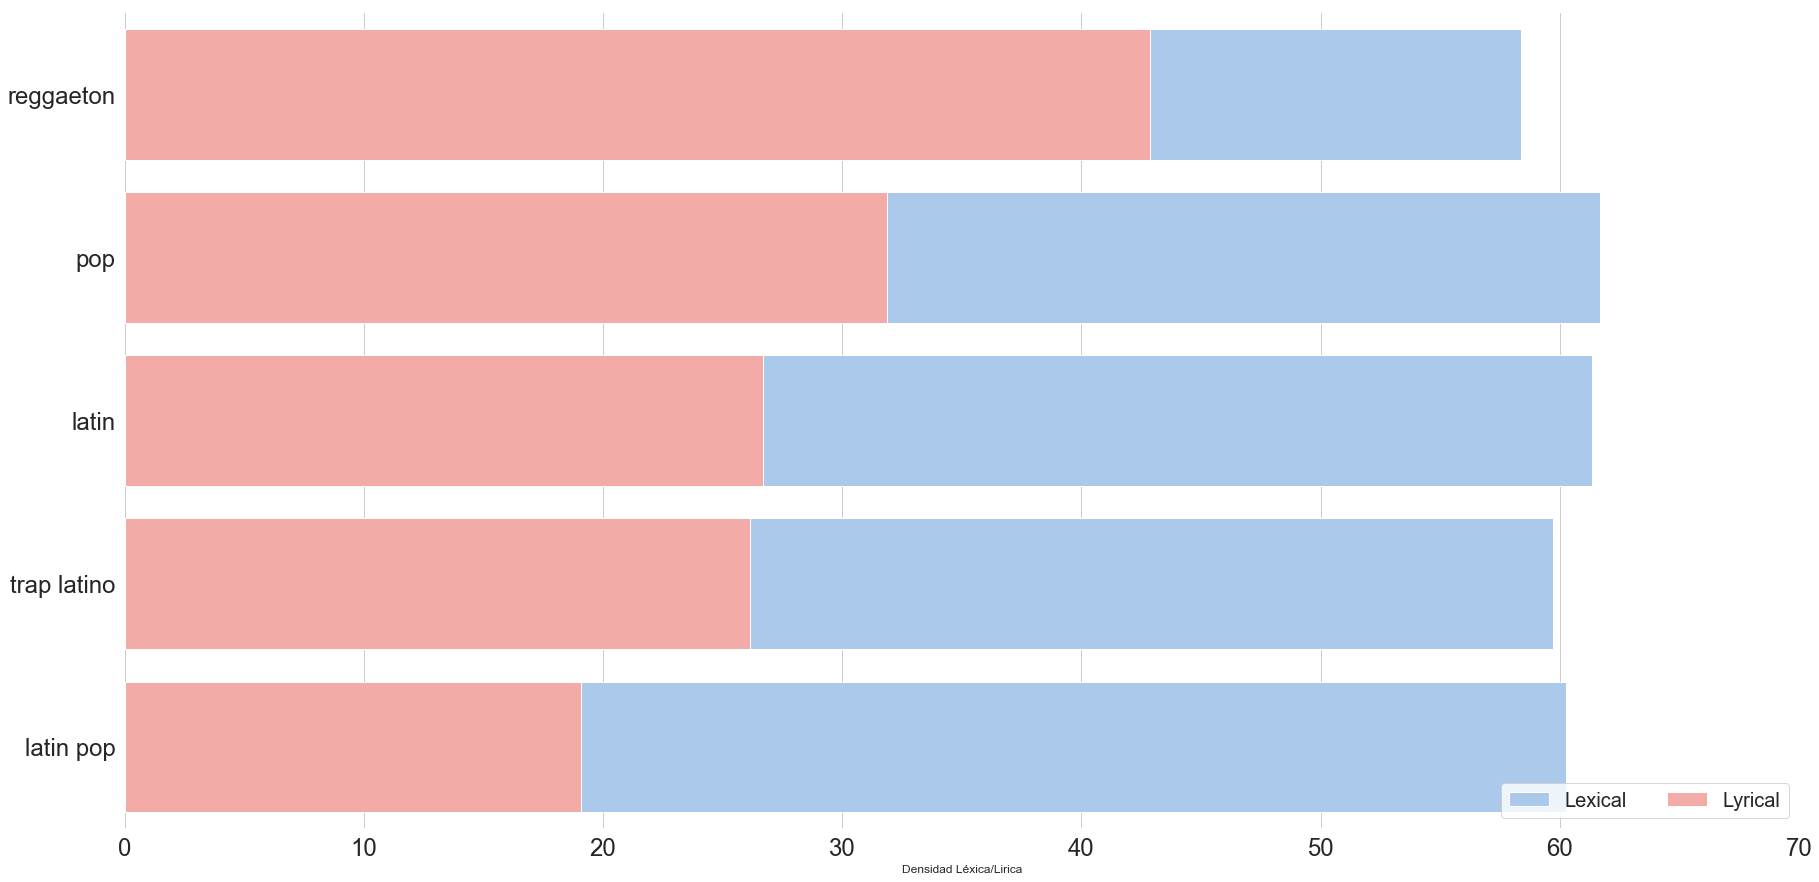

In [34]:
#ax = sns.boxplot(x=df["le_d"])

#fig, ax = plt.subplots(figsize=(30,15))
#sns.barplot(x=df.index, y=df['ly_d'], palette="deep", ax=ax)
#ax.axhline(0, color="k", clip_on=False)
#ax.set_ylabel("Qualitative")
fig, ax = plt.subplots(figsize=(30,15))


ax = sns.barplot(x="le_d", y=df.index, data=df, label="Lexical", color="b")

# Plot the crashes where alcohol was involved
ax = sns.barplot(x="ly_d", y=df.index, data=df,label="Lyrical", color="r", ax=ax)

for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(24) 
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(24)
# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True, fontsize=20)
ax.set(xlim=(0, 70), ylabel="",xlabel="Densidad Léxica/Lirica")
sns.despine(left=True, bottom=True)

In [36]:
music

Unnamed: 0  acousticness  \
0            0        0.1100   
1            1        0.6020   
2            2        0.3230   
3            3        0.0446   
4            4        0.1460   
5            5        0.0361   
6            6        0.3230   
7            7        0.2650   
8            8        0.0275   
9            9        0.1480   
10          10        0.6010   
11          11        0.4100   
12          12        0.0141   
13          13        0.4830   
15          15        0.2520   
16          16        0.4370   
17          17        0.3710   
18          18        0.0436   
19          19        0.1540   
20          20        0.1910   
21          21        0.0165   
22          22        0.3880   
24          24        0.4500   
25          25        0.6160   
26          26        0.0481   
27          27        0.1010   
28          28        0.1270   
29          29        0.0441   
30          30        0.2920   
32          32        0.1870   
33          33        0.1130   
34          34        0.2540   
35          35        0.2910   
36          36        0.1720   
37          37        0.3150   
38          38        0.3580   
40          40        0.1880   
41          41        0.3070   
42          42        0.5560   
43          43        0.4980   
44          44        0.0480   
45          45        0.0231   
46          46        0.4040   
47          47        0.2790   
48          48        0.3980   
49          49        0.1840   

                                           album_name  \
0                                           Con Calma   
1                                             Secreto   
2                                       Calma (Remix)   
3                                               Te Vi   
4                                        Desconocidos   
5                                   Baila Baila Baila   
6                                          Adan y Eva   
7                           Ella Quiere Beber (Remix)   
8                       Baby Girl (feat. Lalo Ebratt)   
9                                              Un Año   
10                                      thank u, next   
11                                  Ni Gucci Ni Prada   
12                                  MIA (feat. Drake)   
13                                               Sola   
15                                                 HP   
16                                            Amanece   
17                          A Star Is Born Soundtrack   
18                                             Sucker   
19                                             Créeme   
20                                            Happier   
21                                          Reggaeton   
22                                 No Te Contaron Mal   
24             Dancing With A Stranger (with Normani)   
25                                             Bubalu   
26                                Amigos Con Derechos   
27                 Dancin (feat. Luvli) [Krono Remix]   
28                                               VIDA   
29         Pa Olvidarte (feat. Manuel Turizo) [Remix]   
30                                     Dile la Verdad   
32                                              Ponle   
33                               Esclavo de Tus Besos   
34   A Night At The Opera (Deluxe Remastered Version)   
35                                           Adictiva   
36                                          DUMMY BOY   
37                                               Aura   
38                                  A Través Del Vaso   
40                                             Rebota   
41                                     Cuando Te Besé   
42                                           X 100PRE   
43                                      Forever Alone   
44                                  Ya No Tiene Novio   
45                                          Me Rehúso   
46  I Can’t Get Enough (benny blanco, Selena Gom

In [2]:
#pd.melt(music, value_vars=['artist_genres'],id_vars=['le_d', 'ly_d'])
music_subset = music[['le_d','ly_d','artist_genres']]
music_subset = music_subset.artist_genres.str.split(',', expand=True)\
.merge(music_subset, right_index = True, left_index = True)\
.drop(["artist_genres"], axis = 1)\
.melt(id_vars = ['le_d', 'ly_d'], value_name = "genres")\
.drop("variable", axis = 1)\
.dropna()



NameError: name 'music' is not defined

In [144]:
list(generos.head().index)
music_subset2 = music_subset[music_subset['genres'].isin(generos.head().index)]
music_subset2

le_d      ly_d       genres
0    66.445623  3.902146        latin
2    64.717349  2.153652    latin pop
4    61.004785  2.044480        latin
5    67.573696  2.784091    reggaeton
8    68.301887  2.425962    latin pop
12   51.010886  3.056549    reggaeton
14   60.336538  2.255525    reggaeton
18   45.393258  2.094187    reggaeton
20   72.860125  3.016373        latin
22   63.976945  2.028884          pop
24   54.423592  1.639733        latin
32   66.286645  2.954011        latin
34   44.776119  2.282366    reggaeton
38   53.949580  2.518881    reggaeton
41   62.719298  2.216659        latin
43   54.402516  2.806373    reggaeton
47   69.128508  2.615920  trap latino
49   57.774141  2.635347        latin
50   61.004785  2.044480    latin pop
51   67.573696  2.784091  trap latino
53   57.142857  2.680562  trap latino
56   59.871589  3.487715          pop
58   51.010886  3.056549  trap latino
59   49.877150  2.086709    reggaeton
61   63.471074  3.184127  trap latino
62   56.709957  1.070768          pop
66   72.860125  3.016373    reggaeton
69   55.109489  2.398323          pop
72   57.344064  3.020671        latin
76   54.251012  2.252601    reggaeton
80   44.776119  2.282366  trap latino
83   67.915309  2.413683          pop
84   53.949580  2.518881  trap latino
91   57.565217  2.541998        latin
92   66.445623  3.902146          pop
95   57.774141  2.635347    latin pop
96   61.004785  2.044480          pop
98   59.104478  2.590483  trap latino
109  52.928870  2.640300          pop
115  55.109489  2.398323    reggaeton
116  54.423592  1.639733    latin pop
118  57.344064  3.020671    latin pop
119  56.347150  3.010709        latin
121  60.052910  2.294177  trap latino
124  66.286645  2.954011          pop
129  67.915309  2.413683    reggaeton
131  70.449679  2.162407  trap latino
133  62.719298  2.216659    latin pop
134  70.024570  2.575509          pop
138  66.445623  3.902146    reggaeton
164  57.344064  3.020671          pop
170  66.286645  2.954011    reggaeton
179  62.719298  2.216659          pop
183  57.565217  2.541998    reggaeton
208  54.423592  1.639733          pop
211  56.347150  3.010709    latin pop
225  62.719298  2.216659    reggaeton
254  54.423592  1.639733    reggaeton

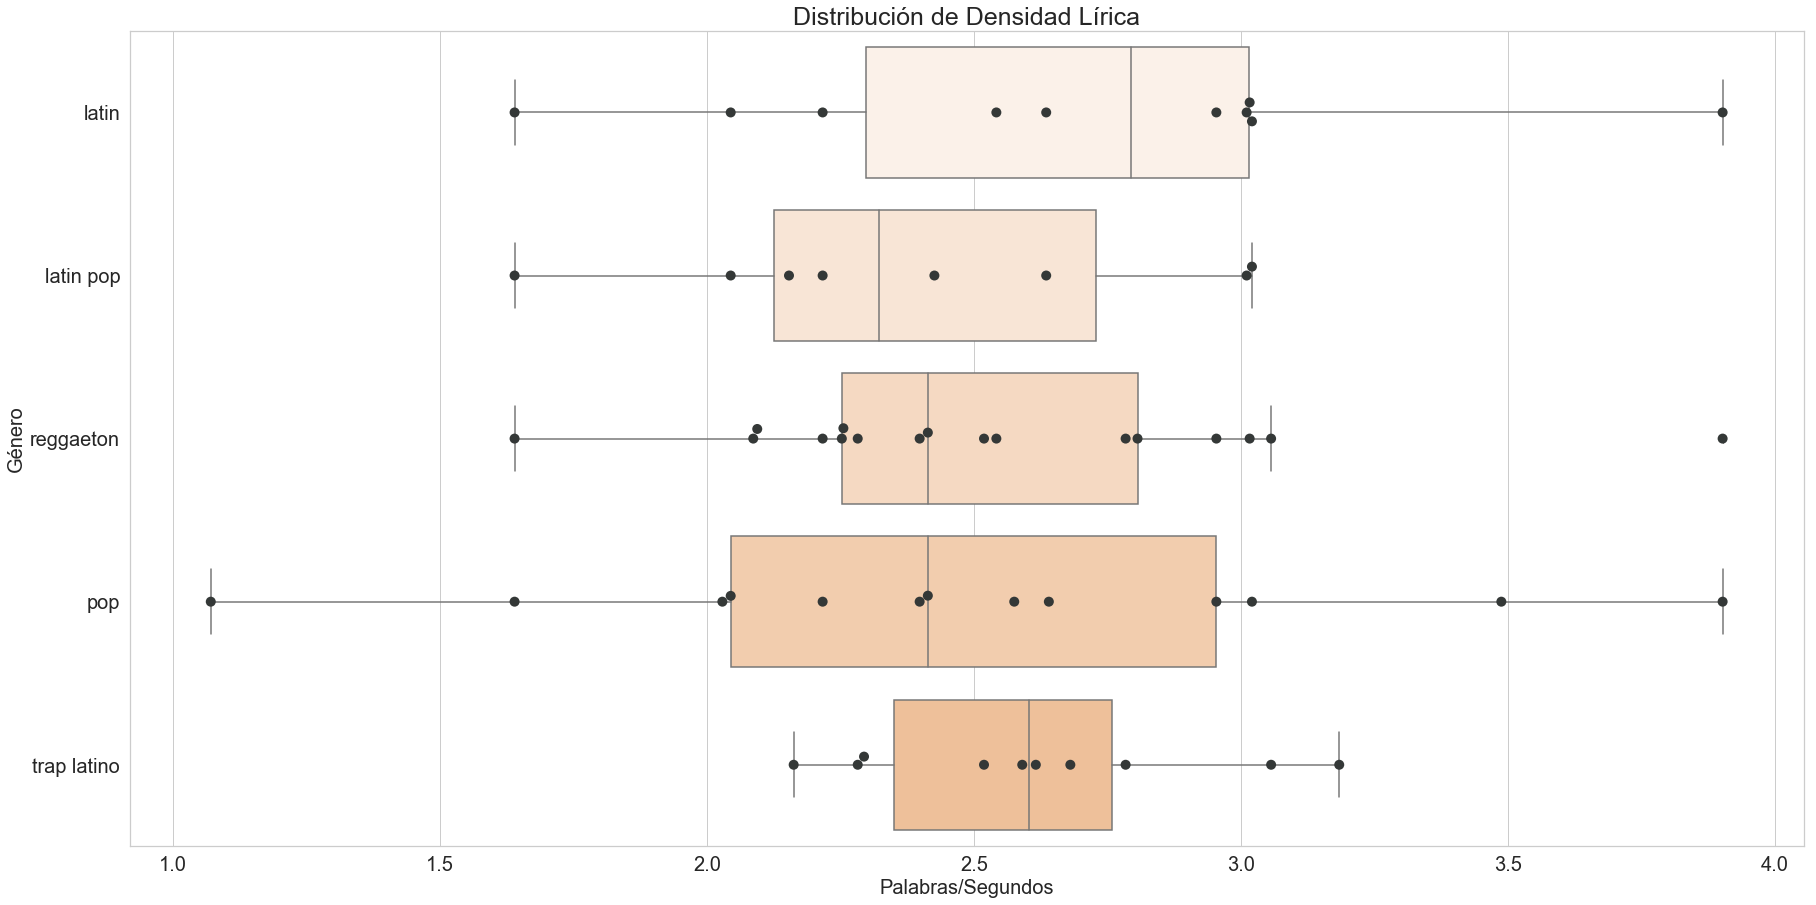

In [147]:
fig, ax = plt.subplots(figsize=(30,15))
ax = sns.boxplot(x="ly_d", y="genres", data=music_subset2, orient='h', palette=sns.light_palette("orange", n_colors=11, input="xkcd"))
ax = sns.swarmplot(x="ly_d", y="genres", data=music_subset2, orient='h', size=10, color="xkcd:charcoal")
plt.xlabel('Palabras/Segundos', fontsize=20)
plt.ylabel('Género', fontsize=20)
plt.title('Distribución de Densidad Lírica', fontsize=25)
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(20) 
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(20) 
#plt.savefig('img/tempo_by_albums.jpg')

plt.plot();

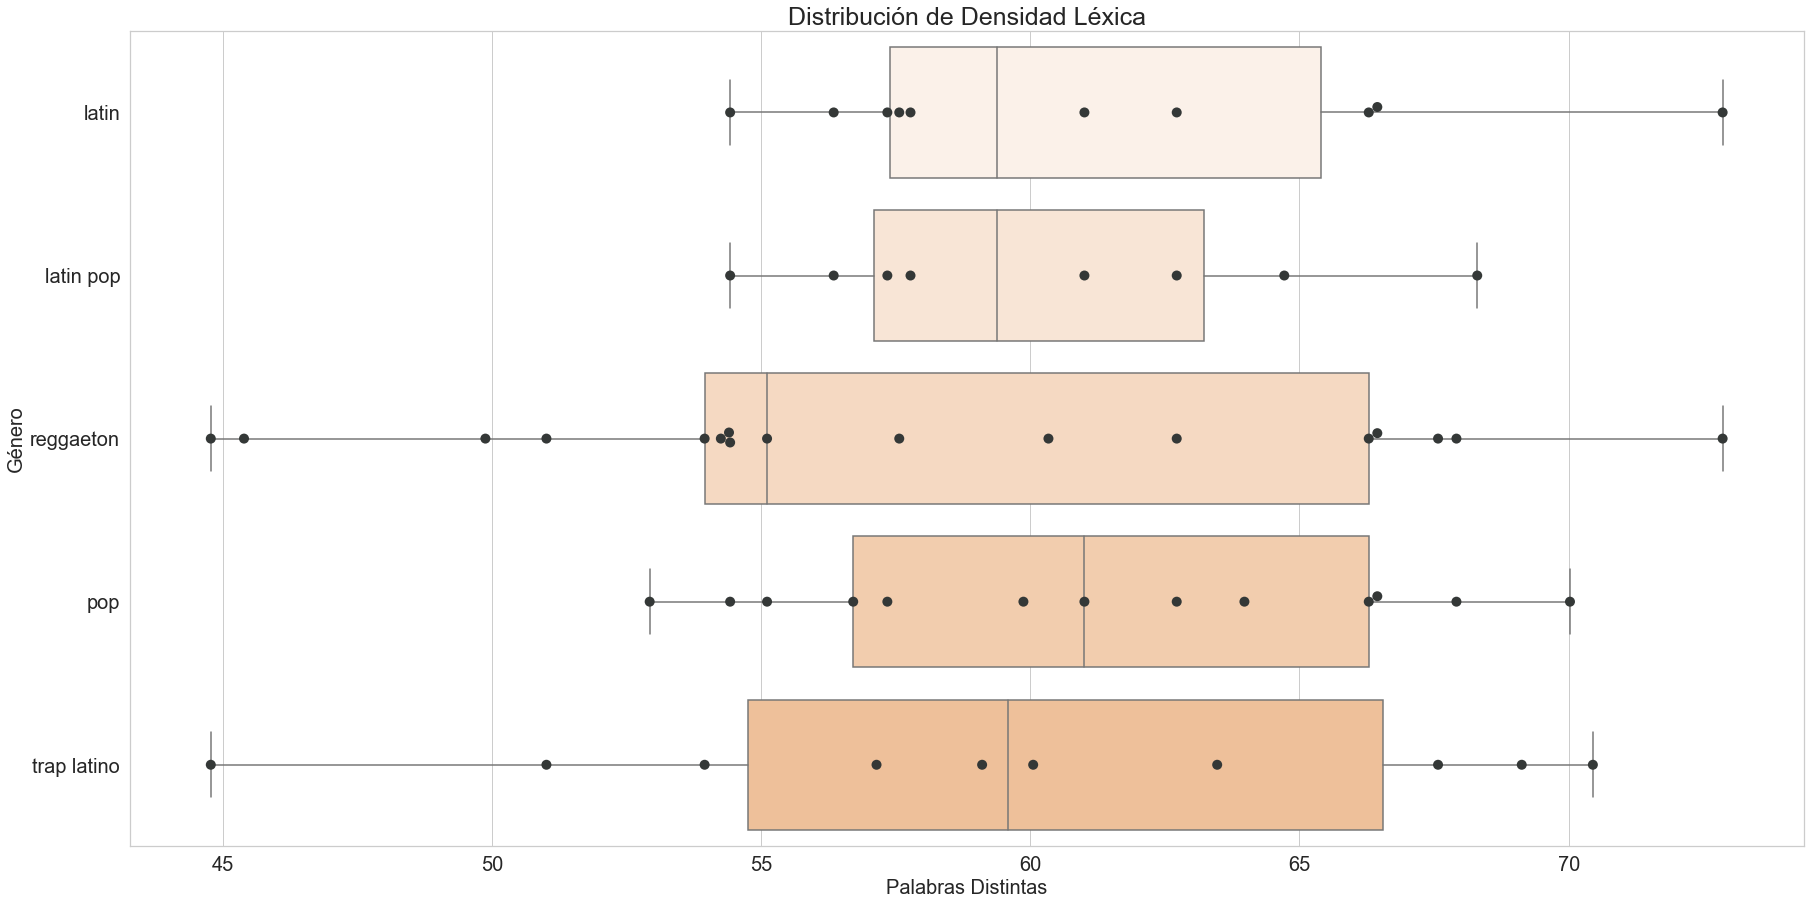

In [149]:
fig, ax = plt.subplots(figsize=(30,15))
ax = sns.boxplot(x="le_d", y="genres", data=music_subset2, orient='h', palette=sns.light_palette("orange", n_colors=11, input="xkcd"))
ax = sns.swarmplot(x="le_d", y="genres", data=music_subset2, orient='h', size=10, color="xkcd:charcoal")
plt.xlabel('Palabras Distintas', fontsize=20)
plt.ylabel('Género', fontsize=20)
plt.title('Distribución de Densidad Léxica', fontsize=25)
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(20) 
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(20) 
#plt.savefig('img/tempo_by_albums.jpg')

plt.plot();

## REFERENCIAS

https://towardsdatascience.com/data-data-1fedfac91c79
https://github.com/alexing/datadata/blob/master/drexler_data_exploration.ipynb
https://github.com/alexing/datadata/blob/master/drexler_dataset_builder.ipynb
https://developer.spotify.com/documentation/web-api/